In [1]:
.libPaths("/no_backup/jferrer/jmidgley/R_libs")
library(dplyr)
library(Seurat)
library(harmony)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built with package ‘Matrix’ 1.7.3 but the current
version is 1.7.4; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: Rcpp



In [2]:
packageVersion("Seurat")

[1] ‘5.3.1’

In [3]:
cat(readLines("/no_backup/jferrer/fmollandin/for_jessie/VASA_processing_new_annotations_hg38.R"), sep = "\n")

Warning message in readLines("/no_backup/jferrer/fmollandin/for_jessie/VASA_processing_new_annotations_hg38.R"):
“incomplete final line found on '/no_backup/jferrer/fmollandin/for_jessie/VASA_processing_new_annotations_hg38.R'”


library(Seurat)
library(dplyr)
library(readxl)
library(tidyr)
library(harmony)

sample_names = read.table("/users/jferrer/fmollandin/ESPACE_data/Realigned_data/scRNA_seq/list_samples.txt")$V1
genes_names <- read.table(paste0("/users/jferrer/projects/Central_Data_Repository/ESPACE_data/processed_data/realigned_scRNA/",sample_names[1],"/filtered_feature_bc_matrix/features.tsv.gz",sep=""))

barcodes_filtered = read.table("/no_backup/jferrer/mplanas/VASAseq/VASA_IDS.csv",
                              sep=";",
                              header=T)

samples_filtered = unique(barcodes_filtered$Sample)

barcodes_filtered = barcodes_filtered[-nrow(barcodes_filtered),]

T2D_id = c("DXAK","HCZL","BJNW","FTGT","ESYP")
ND_id = c("GPRL","HUEN","AYDY","DBHQ","AFLO","BKEK")
rT2D_id = "IEUG"

SO_list=list()

for (i in gsub("NG", "NG-v", barcodes_filtered$X)){
    print(i)
    if (i %in% paste0("HUB-NG-v0",c("12","17","18","20","28","29","35"), sep="")) next   #v020 has too few cells
#    j = gsub("\

In [4]:
new_annotation_df <- read.delim("jessies_gffcompare_v3.0.tsv", header = TRUE, sep = "\t")
new_annotation_df <- unique(new_annotation_df[, c("Gene.stable.ID", "Gene.name")])
new_annotation_df

Gene.stable.ID  Gene.name      
1      ENSG00000162599 NFIA           
2      ENSG00000228606 DCAF8-DT       
3      ENSG00000133019 CHRM3          
4      ENSG00000179546 HTR1D          
5      ENSG00000300424 ENSG00000300424
6      ENSG00000143669 LYST           
7      ENSG00000215808 LINC01139      
8      ENSG00000010072 SPRTN          
9      ENSG00000059588 TARBP1         
10     ENSG00000049245 VAMP3          
11     ENSG00000052723 SIKE1          
12     ENSG00000058799 YIPF1          
13     ENSG00000060642 PIGV           
14     ENSG00000070886 EPHA8          
15     ENSG00000092850 TEKT2          
16     ENSG00000069702 TGFBR3         
17     ENSG00000097046 CDC7           
18     ENSG00000116128 BCL9           
19     ENSG00000189339 SLC35E2B       
20     ENSG00000116251 RPL22          
21     ENSG00000116667 C1orf21        
22     ENSG00000116691 MIIP           
23     ENSG00000116741 RGS2           
24     ENSG00000213047 DENND1B        
25     ENSG00000117305 HMGCL          
26     ENSG00000117385 P3H1           
27     ENSG00000117395 EBNA1BP2       
28     ENSG00000117410 ATP6V0B        
29     ENSG00000117682 DHDDS          
30     ENSG00000117751 PPP1R8         
⋮      ⋮               ⋮              
362022 ENSG00000284820 ENSG00000284820
362169 ENSG00000299396 ENSG00000299396
363220 ENSG00000183506 PI4KAP2        
363686 ENSG00000284554 ENSG00000284554
364096 ENSG00000144649 GASK1A         
364400 ENSG00000308623 ENSG00000308623
364765 ENSG00000206561 COLQ           
365083 ENSG00000240006 LINC02004      
365188 ENSG00000284952 ENSG00000284952
365524 ENSG00000306802 ENSG00000306802
365975 ENSG00000283765 ENSG00000283765
366421 ENSG00000287542 HERC3          
367027 ENSG00000251669 FAM86EP        
367088 ENSG00000137463 MGARP          
367131 ENSG00000251408 ENSG00000251408
367191 ENSG00000285713 ENSG00000285713
367839 ENSG00000272772 ENSG00000272772
369104 ENSG00000113389 NPR3           
369231 ENSG00000137203 TFAP2A         
369310 ENSG00000270800 RPS10-NUDT3    
369315 ENSG00000224846 NQO2-AS1       
369373 ENSG00000289447 ENSG00000289447
369434 ENSG00000204625 HCG9           
369953 ENSG00000244731 C4A            
370186 ENSG00000184106 TREML3P        
370957 ENSG00000205482 SPDYE18        
372204 ENSG00000240211 PPP1R35-AS1    
372562 ENSG00000253696 KBTBD11-OT1    
374225 ENSG00000258728 ENSG00000258728
375735 ENSG00000236064 ENSG00000236064

In [5]:
barcodes_filtered = read.table("/no_backup/jferrer/mplanas/VASAseq/VASA_IDS.csv",
                              sep=";",
                              header=T)
samples_filtered = unique(barcodes_filtered$Sample)
barcodes_filtered = barcodes_filtered[-nrow(barcodes_filtered),]

In [6]:
barcodes_filtered

X         Fastq_ID    Sample  ID   EspaceID
1  HUB-NG005 HUB-NG005   R181    R181 GPRL    
2  HUB-NG006 HUB-NG006   R181    R181 GPRL    
3  HUB-NG007 HUB-NG007   R181    R181 GPRL    
4  HUB-NG008 HUB-NG-v008 R183 d1 R183 HUEN    
5  HUB-NG009 HUB-NG-v009 R183 d1 R183 HUEN    
6  HUB-NG010 HUB-NG-v010 R183 d1 R183 HUEN    
7  HUB-NG011 HUB-NG-v011 R183 d4 R183 HUEN    
8  HUB-NG012 HUB-NG-v012 R183 d4 R183 HUEN    
9  HUB-NG013 HUB-NG-v013 R185    R185 DXAK    
10 HUB-NG014 HUB-NG-v014 R185    R185 DXAK    
11 HUB-NG015 HUB-NG-v015 R185    R185 DXAK    
12 HUB-NG016 HUB-NG-v016 R185    R185 DXAK    
13 HUB-NG017 HUB-NG-v017 R185    R185 DXAK    
14 HUB-NG018 HUB-NG-v018 R185    R185 DXAK    
15 HUB-NG019 HUB-NG-v019 R186    R186 AYDY    
16 HUB-NG020 HUB-NG-v020 R186    R186 AYDY    
17 HUB-NG021 HUB-NG-v021 R187    R187 DBHQ    
18 HUB-NG022 HUB-NG-v022 R187    R187 DBHQ    
19 HUB-NG023 HUB-NG-v023 R195    R195 IEUG    
20 HUB-NG024 HUB-NG-v024 R195    R195 IEUG    
21 HUB-NG025 HUB-NG-v025 R195    R195 IEUG    
22 HUB-NG026 HUB-NG-v026 R195    R195 IEUG    
23 HUB-NG027 HUB-NG-v027 R181    R181 GPRL    
24 HUB-NG028 HUB-NG-v028 R199    R199 AFLO    
25 HUB-NG029 HUB-NG-v029 R199    R199 AFLO    
26 HUB-NG030 HUB-NG-v030 R199    R199 AFLO    
27 HUB-NG031 HUB-NG-v031 R199    R199 AFLO    
28 HUB-NG032 HUB-NG-v032 R199    R199 AFLO    
29 HUB-NG033 HUB-NG-v033 R204    R204 BKEK    
30 HUB-NG034 HUB-NG-v034 R204    R204 BKEK    
31 HUB-NG036 HUB-NG-v036 R204    R204 BKEK    
32 HUB-NG035 HUB-NG-v035 R204    R204 BKEK    
33 HUB-NG037 HUB-NG-v037 R181    R181 GPRL    
34 HUB-NG038 HUB-NG-v038 R201    R201 HCZL    
35 HUB-NG039 HUB-NG-v039 R201    R201 HCZL    
36 HUB-NG040 HUB-NG-v040 R201    R201 HCZL    
37 HUB-NG041 HUB-NG-v041 R201    R201 HCZL    
38 HUB-NG042 HUB-NG-v042 P679    P679 BJNW    
39 HUB-NG043 HUB-NG-v043 P679    P679 BJNW    
40 HUB-NG044 HUB-NG-v044 P679    P679 BJNW    
41 HUB-NG045 HUB-NG-v045 R222    R222 ESYP    
42 HUB-NG046 HUB-NG-v046 R222    R222 ESYP    
43 HUB-NG047 HUB-NG-v047 R222    R222 ESYP    
44 HUB-NG048 HUB-NG-v048 R222    R222 ESYP    
45 HUB-NG049 HUB-NG-v049 R222    R222 ESYP    
46 HUB-NG050 HUB-NG-v050 R219    R219 FTGT    
47 HUB-NG051 HUB-NG-v051 R219    R219 FTGT    
48 HUB-NG052 HUB-NG-v052 R219    R219 FTGT    
49 HUB-NG053 HUB-NG-v053 R219    R219 FTGT    
50 HUB-NG054 HUB-NG-v054 R219    R219 FTGT

In [7]:
T2D_id = c("DXAK","HCZL","BJNW","FTGT","ESYP")
ND_id  = c("GPRL","HUEN","AYDY","DBHQ","AFLO","BKEK")
rT2D_id = "IEUG"

In [ ]:
SO_list = list()
for (i in gsub("NG", "NG-v", barcodes_filtered$X)){
    print(i)
    if (i %in% paste0("HUB-NG-v0", c("12","17","18","19","20","28","29","35"))) next
    path_count = paste0("/no_backup/jferrer/jmidgley/VASAseq/RERUN/processed/", i, "/bam/", i, ".output.countTable", sep="")
    counts.mat = read.table(path_count, sep=",", header=T, row.names=NULL)
    rownames(counts.mat) = make.unique(counts.mat$X)
    counts.mat = counts.mat[,-c(1,2)]
    counts.mat[is.na(counts.mat)] <- 0

    matched_names <- new_annotation_df$Gene.name[match(rownames(counts.mat), new_annotation_df$Gene.stable.ID)]
    rownames(counts.mat) <- make.names(matched_names, unique = TRUE)  
  
    SO_list[[i]] <- CreateSeuratObject(counts = counts.mat,
                             project = i,
                             min.cells= 3,
                             min.features = 200)
    

    SO_list[[i]][["percent.mt"]] <- PercentageFeatureSet(SO_list[[i]], pattern = "^MT-")
    
    SO_list[[i]]  <- subset(SO_list[[i]] ,  subset = nFeature_RNA > 1000 & nFeature_RNA < 10000 & percent.mt < 5)
    
    SO_list[[i]] <- NormalizeData(SO_list[[i]], normalization.method = "LogNormalize", scale.factor = 10000)
    
    SO_list[[i]] <- FindVariableFeatures(SO_list[[i]], selection.method = "vst", nfeatures = 2000)
    
    all.genes <- rownames(SO_list[[i]])
    SO_list[[i]] <- ScaleData(SO_list[[i]], features = all.genes)
    
    SO_list[[i]] <- RunPCA(SO_list[[i]], features = VariableFeatures(object = SO_list[[i]]),npcs = min(50, nrow(SO_list[[i]])-1, ncol(SO_list[[i]])-1))
    
    SO_list[[i]] <- FindNeighbors(SO_list[[i]], dims = 1:min(20, nrow(SO_list[[i]])-1, ncol(SO_list[[i]])-1))
    SO_list[[i]] <- FindClusters(SO_list[[i]], resolution = 0.5)
    
    SO_list[[i]] <- RunUMAP(SO_list[[i]], dims = 1:min(20, nrow(SO_list[[i]])-1, ncol(SO_list[[i]])-1))
    
}


[1] "HUB-NG-v005"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  KCNMA1, ABCC8, CHGB, PAX6, NOL4, MEIS2, ST18, GNAO1, SPTB, PAK3 
	   BAIAP3, RTN1, SCD, TMEM63C, HS6ST3, MTMR7, CHGA, SLC2A13, ATP2A3, VGF 
	   UCHL1, EEF1A2, STX1A, CPLX2, CACNA1A, NEURL1, C14orf132, KCNMB2, WNT4, MAP1A 
Negative:  PIEZO1, PMEPA1, AHNAK, COL18A1, SMAD3, FLNA, HSPG2, NEK6, NOTCH2, EGFR 
	   ABCC3, LAMC2, IL4R, TACSTD2, EPHA2, ITGA2, HMGA1, SDC4, RUNX1, LAMB3 
	   KRT7, CDC42EP1, DAB2IP, TGFA, KRT18, CCND1, ST3GAL1, TINAGL1, AGRN, SERPING1 
PC_ 2 
Positive:  KRT8, MYO5B, ABCC3, KRT7, SERINC2, LMO7, ITGA3, ALS2CL, LAMC2, MET 
	   EHF, SH2D3A, SHROOM3, EPHB2, ITGB4, TGFA, AGRN, MST1R, LAD1, TACSTD2 
	   CARD10, INAVA, DCDC2, NCEH1, RNF213, ONECUT2, SEL1L3, RHPN2, KRT18, PRSS8 
Negative:  AE

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 362
Number of edges: 10148

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8732
Number of communities: 6
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
18:29:26 UMAP embedding parameters a = 0.9922 b = 1.112

18:29:26 Read 362 rows and found 20 numeric columns

18:29:26 Using Annoy for neighbor search, n_neighbors = 30

18:29:26 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:29:26 Writing NN index file to temp file /tmp/19011650/RtmpDCZ5GF/file3265683f6acccf

18:29:26 Searching Annoy index using 1 thread, search_k = 3000

18:29:26 Annoy recall = 100%

18:29:26 Commencing smooth kNN distance calibration using 1 thread
 with target n_n

[1] "HUB-NG-v006"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  KCNMA1, ABCC8, KCNB2, PCSK2, ST18, PAX6, CHGA, MTMR7, BAIAP3, ALPK3 
	   RTN1, SPTB, MYO3A, SCD, PAPSS2, VGF, ADGRG1, KCNJ6, SLC7A8, FAM167A 
	   GRIA3, ATP2A3, CPLX2, STX1A, GABRB3, KCNMB2, TMEM63C, LINGO2, ERO1B, C14orf132 
Negative:  PIEZO1, SMAD3, PMEPA1, AHNAK, CD44, IL4R, EGFR, HSPG2, NOTCH2, COL18A1 
	   ABCC3, FLNA, SVIL, LAMC2, NEK6, RUNX1, SDC4, HMGA1, ITGA2, CDC42EP1 
	   TACSTD2, OSMR, TUBB6, EPHA2, TNFRSF10B, MET, KRT7, MSN, ZFP36L1, TMEM63A 
PC_ 2 
Positive:  KRT8, SERINC2, ITGA3, KRT18, ABCC3, LAD1, MET, LAMC2, NHSL3, TGFA 
	   ANXA4, LAMB3, SH2D3A, TACSTD2, INAVA, KRT7, ALS2CL, EPHA2, JUP, THSD4 
	   BACE2, TPM1, MALL, EPHB2, EHF, LMO7, RHPN2, SLC12A7, AGRN, ALDH1A3 
Negative:  MMP2, AEBP

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 364
Number of edges: 10505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8611
Number of communities: 5
Elapsed time: 0 seconds


18:29:32 UMAP embedding parameters a = 0.9922 b = 1.112

18:29:32 Read 364 rows and found 20 numeric columns

18:29:32 Using Annoy for neighbor search, n_neighbors = 30

18:29:32 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:29:32 Writing NN index file to temp file /tmp/19011650/RtmpDCZ5GF/file326568168422a5

18:29:32 Searching Annoy index using 1 thread, search_k = 3000

18:29:32 Annoy recall = 100%

18:29:32 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:29:33 Initializing from normalized Laplacian + noise (using RSpectra)

18:29:33 Commencing optimization for 500 epochs, with 13798 positive edges

18:29:33 Using rng type: pcg

18:29:33 Optimization finished



[1] "HUB-NG-v007"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  PIEZO1, PMEPA1, SMAD3, AHNAK, HSPG2, FLNA, SVIL, COL18A1, EGFR, ABCC3 
	   CD44, IL4R, RUNX1, SDC4, NOTCH2, TACSTD2, LAMC2, ITGA2, KRT7, CDC42EP1 
	   OSMR, MSN, CCND1, HMGA1, MYOF, NEK6, FOSL1, CLDN1, ANXA2, TUBB6 
Negative:  CHGB, ABCC8, KCNB2, RIMBP2, ST18, SNAP25, PAK3, PAX6, RTN1, HS6ST3 
	   MLXIPL, CHGA, TMEM63C, VGF, TMEM178B, KCNMB2, ATP2A3, KCNJ6, EML5, MAP1B 
	   SLC7A8, C14orf132, GRIA3, LINC01014, ISL1, CPLX2, ERO1B, HMGCLL1, ADGRG1, PAPSS2 
PC_ 2 
Positive:  KRT8, MYO5B, LAMC2, ITGA3, SERINC2, KRT7, BAIAP2L1, KRT18, BCL2L1, MET 
	   ABCC3, INAVA, LAD1, LMO7, TGFA, SH2D3A, CLDN4, KRT80, ALS2CL, MST1R 
	   CDCP1, RHPN2, LAMB3, NCEH1, AGRN, JUP, CLDN1, ITGB4, TPM1, CLMN 
Negative:  BGN, COL6A3

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 354
Number of edges: 9132

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8680
Number of communities: 5
Elapsed time: 0 seconds


18:29:37 UMAP embedding parameters a = 0.9922 b = 1.112

18:29:37 Read 354 rows and found 20 numeric columns

18:29:37 Using Annoy for neighbor search, n_neighbors = 30

18:29:37 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:29:37 Writing NN index file to temp file /tmp/19011650/RtmpDCZ5GF/file3265682cd82adc

18:29:37 Searching Annoy index using 1 thread, search_k = 3000

18:29:37 Annoy recall = 100%

18:29:37 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:29:38 Initializing from normalized Laplacian + noise (using RSpectra)

18:29:38 Commencing optimization for 500 epochs, with 12674 positive edges

18:29:38 Using rng type: pcg

18:29:38 Optimization finished



[1] "HUB-NG-v008"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  CHGB, RIMBP2, SPTB, SLC22A17, ABCC8, PAX6, EEF1A2, KIF1A, PCSK2, SNAP25 
	   CHGA, TMEM63C, DPP6, SCD, VGF, BAIAP3, PAK3, STX1A, SLC7A8, TMEM132D 
	   CAMK2B, ST18, PEMT, HS6ST3, KCNJ6, MLXIPL, ERO1B, ATP2A3, SLC2A13, C14orf132 
Negative:  PIEZO1, IL4R, YBX3, CDC42EP1, PMEPA1, ABCC3, TMEM63A, TACSTD2, SMAD3, NOTCH2 
	   C3, CLDN1, ANO6, OSMR, PPARD, EGFR, KRT7, RASEF, DAB2IP, HSPG2 
	   ITGA2, AHNAK, KRT18, TM4SF1, LAMB2, PDLIM7, SERPING1, INAVA, LAMB3, NEK6 
PC_ 2 
Positive:  FMNL3, NRP2, PTPRE, SPARC, COL4A1, ENG, A2M, DOCK4, PDE4B, ITPRIP 
	   TCF4, PXDN, IGFBP4, COL15A1, COL4A2, SLC2A3, ADAMTS4, NID1, CD93, ZEB2 
	   PRDM1, JARID2, SNAI1, LAMA4, ADGRF5, RIN3, ARHGAP31, NES, ITPKB, SRGN 
Negative:  KR

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 344
Number of edges: 9049

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8582
Number of communities: 6
Elapsed time: 0 seconds


18:29:42 UMAP embedding parameters a = 0.9922 b = 1.112

18:29:42 Read 344 rows and found 20 numeric columns

18:29:42 Using Annoy for neighbor search, n_neighbors = 30

18:29:42 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:29:42 Writing NN index file to temp file /tmp/19011650/RtmpDCZ5GF/file326568428b9852

18:29:42 Searching Annoy index using 1 thread, search_k = 3000

18:29:42 Annoy recall = 100%

18:29:42 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:29:42 Initializing from normalized Laplacian + noise (using RSpectra)

18:29:42 Commencing optimization for 500 epochs, with 12288 positive edges

18:29:42 Using rng type: pcg

18:29:43 Optimization finished



[1] "HUB-NG-v009"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  PTPRN, CPE, CHGB, NFASC, PAM, RIMBP2, UNC13A, SYT7, CACNA1C, NOL4 
	   RAB3B, CADPS, CACNA1D, ABCC8, SLC22A17, PAX6, CHGA, UNC80, CELSR3, KCNMA1 
	   SPTB, BAIAP3, TMEM63C, VGF, KCNB2, STX1A, PCSK2, RTN1, VWA5B2, SCD 
Negative:  IL4R, ABCC3, TACSTD2, PIEZO1, PMEPA1, SMAD3, C3, CDC42EP1, NOTCH2, PPARD 
	   ITGA2, KRT7, RASEF, EGFR, TM4SF1, SAT1, CLDN1, INAVA, NEK6, TNFRSF10B 
	   OSMR, ZFP36L1, AHNAK, KRT18, HSPG2, SDC4, TCIRG1, LAMB2, KRT8, SVIL 
PC_ 2 
Positive:  DOCK4, PDE4B, PTPRE, LAPTM5, FMNL3, SRGN, TNFRSF1B, SEMA6B, PIK3R5, RUNX3 
	   NRP2, BASP1, RFTN1, PLA2G7, PRDM1, ITGAX, CYRIA, ZEB2, JARID2, SPI1 
	   SLC15A3, MYO1F, RIN3, GPR183, TGFBI, IL10RA, OLR1, CD83, EMILIN2, HLA.DRA 
Negative:  ERRFI1

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 352
Number of edges: 9544

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8598
Number of communities: 6
Elapsed time: 0 seconds


18:29:46 UMAP embedding parameters a = 0.9922 b = 1.112

18:29:46 Read 352 rows and found 20 numeric columns

18:29:46 Using Annoy for neighbor search, n_neighbors = 30

18:29:46 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:29:46 Writing NN index file to temp file /tmp/19011650/RtmpDCZ5GF/file32656813dfa41d

18:29:46 Searching Annoy index using 1 thread, search_k = 3000

18:29:46 Annoy recall = 100%

18:29:47 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:29:47 Initializing from normalized Laplacian + noise (using RSpectra)

18:29:47 Commencing optimization for 500 epochs, with 12646 positive edges

18:29:47 Using rng type: pcg

18:29:48 Optimization finished



[1] "HUB-NG-v010"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  MSN, C3, TACSTD2, IL4R, ABCC3, PMEPA1, CDC42EP1, PIEZO1, TM4SF1, CLDN1 
	   SERPINA3, ITGA2, RASEF, SMAD3, OSMR, ZFP36L1, EGFR, KRT7, NOTCH2, NFIB 
	   IFITM3, TMEM63A, KRT18, MET, TNFRSF10B, NHSL3, SVIL, NEK6, AHNAK, PPARD 
Negative:  UNC13A, ABCC8, CACNA1D, RIMBP2, SLC22A17, PTPRN2, GNAO1, SPTB, KCNB2, NOL4 
	   VGF, PAX6, DPP6, CHGA, ERO1B, SNAP25, RTN1, MAPK10, STX1A, SLC7A8 
	   VWA5B2, KCNJ6, PAPSS2, BAIAP3, MTMR7, CAMK2B, TMEM63C, C14orf132, MYO3A, ST18 
PC_ 2 
Positive:  ADAMTS4, SPARC, CD93, TCF4, PXDN, COL15A1, FLT1, COL4A1, ENG, SPARCL1 
	   PLVAP, COL4A2, VWF, PTPRB, LAMA4, CDH5, KDR, F2RL3, ACVRL1, BCL6B 
	   ADGRF5, AFAP1L1, ERG, FMNL3, DYSF, ADGRL4, FLT4, SERPINE1, ROBO4, PTPRE 
Negative: 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 350
Number of edges: 9660

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8417
Number of communities: 6
Elapsed time: 0 seconds


18:29:51 UMAP embedding parameters a = 0.9922 b = 1.112

18:29:51 Read 350 rows and found 20 numeric columns

18:29:51 Using Annoy for neighbor search, n_neighbors = 30

18:29:51 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:29:51 Writing NN index file to temp file /tmp/19011650/RtmpDCZ5GF/file326568546c00fc

18:29:51 Searching Annoy index using 1 thread, search_k = 3000

18:29:51 Annoy recall = 100%

18:29:51 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:29:52 Initializing from normalized Laplacian + noise (using RSpectra)

18:29:52 Commencing optimization for 500 epochs, with 12320 positive edges

18:29:52 Using rng type: pcg

18:29:52 Optimization finished



[1] "HUB-NG-v011"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  CHGB, PCSK2, VGF, TTR, BAIAP3, CHGA, ENPP2, PRUNE2, CELF3, ENSG00000293389 
	   ACLY, MIR7.3HG, PEG10, PEMT, INSM1, GCG, SLC6A17, GRM4, PCSK1, CDC42EP3.AS1 
	   PDE10A, SLC38A4, ISL1, INS, SUSD4, STX1A, GCNT1, KNDC1, ELMO1, UCHL1 
Negative:  PMEPA1, KRT7, FLRT2, ABCC3, EGFR, C3, TACSTD2, SERPING1, NFIB, CLDN1 
	   DAB2IP, HSPG2, ONECUT1, CD44, NR5A2, NOTCH2, CDC42EP1, AGRN, CFTR, LAMB2 
	   IL4R, TMEM63A, SMAD3, AHNAK, BICC1, YAP1, SVIL, PKHD1, EXT1, FLNA 
PC_ 2 
Positive:  MYRF, SHROOM3, KRT8, WWC1, EHF, ANXA4, C4orf19, SHB, NHSL3, UNC5CL 
	   PROX1, SLC44A3.AS1, MAP2, CLDN4, FLRT2, ONECUT1, CLDN1, ERBB3, ONECUT2, TACSTD2 
	   PKHD1, NR5A2, SERPINA1, EGR3, DCDC2, KRT18, KRT7, ITGB8, PLEKHA7, AQP1 
Negat

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 355
Number of edges: 9758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8209
Number of communities: 6
Elapsed time: 0 seconds


18:29:55 UMAP embedding parameters a = 0.9922 b = 1.112

18:29:55 Read 355 rows and found 20 numeric columns

18:29:55 Using Annoy for neighbor search, n_neighbors = 30

18:29:55 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:29:55 Writing NN index file to temp file /tmp/19011650/RtmpDCZ5GF/file32656859cf56b

18:29:55 Searching Annoy index using 1 thread, search_k = 3000

18:29:55 Annoy recall = 100%

18:29:56 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:29:56 Initializing from normalized Laplacian + noise (using RSpectra)

18:29:56 Commencing optimization for 500 epochs, with 13538 positive edges

18:29:56 Using rng type: pcg

18:29:57 Optimization finished



[1] "HUB-NG-v012"
[1] "HUB-NG-v013"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  CHGB, NOL4, SLC30A8, ABCC8, ATP2A3, ENSG00000293389, GCH1, GCG, ALDH1A1, SMOC1 
	   ERO1B, RGS9, KCNMB2, LINC01014, PDE3B, EDIL3, ENPP2, BAIAP3, CDC42EP3.AS1, PAPPA2 
	   TMEM63C, ROBO2, RFX6, C2CD4A, KCTD12, SLC7A14, C2CD4B, CRYBA2, WNT4, PEG10 
Negative:  PMEPA1, HSPG2, SMAD3, LAMB3, CDC42EP1, AHNAK, PIEZO1, EGFR, CLDN1, FLNA 
	   OSMR, KRT7, NOTCH2, ABCC3, TACSTD2, COL18A1, SVIL, C3, DAB2IP, ITGA2 
	   CD44, CFTR, TINAGL1, EPHB2, MET, TMEM63A, KRT80, NEK6, ITGB4, NFIB 
PC_ 2 
Positive:  COL6A3, COL5A1, PDGFRB, COL5A3, PRRX1, COL1A2, LAMC3, ADAMTS12, EMILIN1, BGN 
	   CRISPLD2, NID2, VSTM4, COL6A2, GGT5, GLI2, SFRP2, NES, COL7A1, SPARC 
	   HTRA3, TIMP3, NID1, MRC2, CD248, TGFB3, THBS2, GFPT2, SRPX2, M

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 363
Number of edges: 12031

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8113
Number of communities: 4
Elapsed time: 0 seconds


18:30:00 UMAP embedding parameters a = 0.9922 b = 1.112

18:30:00 Read 363 rows and found 20 numeric columns

18:30:00 Using Annoy for neighbor search, n_neighbors = 30

18:30:00 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:30:00 Writing NN index file to temp file /tmp/19011650/RtmpDCZ5GF/file3265681758a51f

18:30:00 Searching Annoy index using 1 thread, search_k = 3000

18:30:00 Annoy recall = 100%

18:30:00 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:30:01 Initializing from normalized Laplacian + noise (using RSpectra)

18:30:01 Commencing optimization for 500 epochs, with 14472 positive edges

18:30:01 Using rng type: pcg

18:30:01 Optimization finished



[1] "HUB-NG-v014"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  SMAD3, HSPG2, KRT7, ABCC3, PIEZO1, SVIL, AHNAK, FLNA, PMEPA1, EGFR 
	   LAD1, TACSTD2, NFIB, CLDN1, LAMB3, TMEM63A, CDC42EP1, TINAGL1, NOTCH2, OSMR 
	   CD44, COL18A1, ITGB4, NEK6, IL4R, DAB2IP, PRAG1, SCNN1A, TGFA, AGRN 
Negative:  ABCC8, VGF, BAIAP3, ST18, SLC30A8, SMOC1, ERO1B, KCNMB2, STX1A, LINC01014 
	   PDE10A, MAP1A, EDIL3, ELAVL4, ENPP2, PDZD2, PDE3B, GCH1, GCG, GRIA3 
	   MIR7.3HG, SLC29A4, MLXIPL, TMEM200A, CHD5, ALDH1A1, CACNA2D2, MAFB, PEG10, GCNT1 
PC_ 2 
Positive:  INS, HADH, CASR, HDAC9, GLP1R, SORL1, SYNE2, GSN, TIMP2, NPTX2 
	   SSTR5.AS1, SAMD11, TRPM3, LDLRAD4, ZNF385D, NRG1, MAFA, ENSG00000307759, TGFBR3, PDX1 
	   GCGR, ADCYAP1, OLFM1, ROBO1, VAT1L, SCD5, CDH22, SLC6A6, ANGPTL2, BMF

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 352
Number of edges: 10783

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8036
Number of communities: 4
Elapsed time: 0 seconds


18:30:05 UMAP embedding parameters a = 0.9922 b = 1.112

18:30:05 Read 352 rows and found 20 numeric columns

18:30:05 Using Annoy for neighbor search, n_neighbors = 30

18:30:05 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:30:05 Writing NN index file to temp file /tmp/19011650/RtmpDCZ5GF/file326568327c7273

18:30:05 Searching Annoy index using 1 thread, search_k = 3000

18:30:05 Annoy recall = 100%

18:30:05 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:30:06 Initializing from normalized Laplacian + noise (using RSpectra)

18:30:06 Commencing optimization for 500 epochs, with 14152 positive edges

18:30:06 Using rng type: pcg

18:30:06 Optimization finished



[1] "HUB-NG-v015"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  VGF, ABCC8, SLC30A8, ENSG00000293389, ERO1B, BAIAP3, SMOC1, OGDHL, MIR7.3HG, GCG 
	   EDIL3, PDE10A, ENPP2, PDE3B, ELAVL4, CDC42EP3.AS1, PEG10, WNT4, PDZD2, ALDH1A1 
	   PDK4, MCF2L2, TENM4, CRYBA2, GC, SCGN, PAPPA2, RFX6, TUNAR, VWDE 
Negative:  PMEPA1, HSPG2, ABCC3, FLNA, SMAD3, PIEZO1, CDC42EP1, EGFR, KRT7, COL18A1 
	   LAMB3, LAD1, TMEM63A, C3, DAB2IP, NOTCH2, CD44, AHNAK, SVIL, CLDN1 
	   IL4R, NFIB, TACSTD2, NEK6, CFTR, OSMR, ITGB6, RBPMS, TINAGL1, YAP1 
PC_ 2 
Positive:  SPINT1, KRT8, MYRF, ST14, SERINC2, NBEAL2, PTPRF, EHF, ANXA4, SHROOM3 
	   NHSL3, NEDD9, CARD10, LAMC2, ACTN4, TUFT1, SHB, EEIG1, ZFP36, KIAA1217 
	   CLDN4, KRT18, ERRFI1, PHLDB2, KRT7, MYO5B, ANKRD36C, SLC4A4, AGRN, NCEH1 
Negat

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 359
Number of edges: 11230

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8096
Number of communities: 5
Elapsed time: 0 seconds


18:30:09 UMAP embedding parameters a = 0.9922 b = 1.112

18:30:09 Read 359 rows and found 20 numeric columns

18:30:09 Using Annoy for neighbor search, n_neighbors = 30

18:30:09 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:30:09 Writing NN index file to temp file /tmp/19011650/RtmpDCZ5GF/file32656851e3ff7d

18:30:09 Searching Annoy index using 1 thread, search_k = 3000

18:30:09 Annoy recall = 100%

18:30:10 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:30:10 Initializing from normalized Laplacian + noise (using RSpectra)

18:30:10 Commencing optimization for 500 epochs, with 13728 positive edges

18:30:10 Using rng type: pcg

18:30:11 Optimization finished



[1] "HUB-NG-v016"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  EGFR, HSPG2, FLNA, AHNAK, NEK6, SMAD3, NOTCH2, PMEPA1, CDC42EP1, RUNX1 
	   DAB2IP, IL4R, ITGB4, TMEM63A, PIEZO1, KRT7, TINAGL1, COL18A1, SVIL, ABCC3 
	   LAMB3, OSMR, NFIB, TACSTD2, CD44, YAP1, TUBB6, YBX3, LAD1, RBPMS 
Negative:  CHGB, SNAP25, ABCC8, ST18, VGF, ATP2A3, PAX6, BAIAP3, SLC30A8, TMEM132D 
	   MIR7.3HG, SMOC1, MLXIPL, KCNMB2, PDE10A, MCF2L2, ELAVL4, PDE3B, STX1A, ERO1B 
	   C2CD4A, LINC01014, MTUS2, WNT4, TTR, SREBF1, GRIA3, ENPP2, ROBO2, EDIL3 
PC_ 2 
Positive:  GLI2, PDGFRB, PRRX1, LAMC3, COL6A3, CDH11, NID1, MRC2, BGN, COL6A2 
	   GGT5, NES, THBS2, SPON1, EMILIN1, TGFB1, COL5A3, ADAMTS12, TBX2, COL15A1 
	   FKBP10, VCAN, CRISPLD2, S1PR3, COL5A1, COL1A1, PDE3A, COL1A2, COL7A1, CARMN 
Nega

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 351
Number of edges: 10248

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8085
Number of communities: 5
Elapsed time: 0 seconds


18:30:14 UMAP embedding parameters a = 0.9922 b = 1.112

18:30:14 Read 351 rows and found 20 numeric columns

18:30:14 Using Annoy for neighbor search, n_neighbors = 30

18:30:14 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:30:14 Writing NN index file to temp file /tmp/19011650/RtmpDCZ5GF/file32656855d98844

18:30:14 Searching Annoy index using 1 thread, search_k = 3000

18:30:14 Annoy recall = 100%

18:30:14 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:30:15 Initializing from normalized Laplacian + noise (using RSpectra)

18:30:15 Commencing optimization for 500 epochs, with 13416 positive edges

18:30:15 Using rng type: pcg

18:30:15 Optimization finished



[1] "HUB-NG-v017"
[1] "HUB-NG-v018"
[1] "HUB-NG-v019"
[1] "HUB-NG-v020"
[1] "HUB-NG-v021"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  SMAD3, SDC4, HSPG2, EGFR, TNFRSF10B, PIEZO1, TNIP1, KRT7, SVIL, ABCC3 
	   PMEPA1, LAMB3, IL4R, CXCL8, EPHA2, RASEF, OSMR, CXCL2, CXCL1, INAVA 
	   TGFA, AHNAK, PLAUR, CD44, KRT18, MET, PRSS8, TACSTD2, THSD4, ZC3H12A 
Negative:  KCNB2, SLC30A8, ABCC8, VGF, PAX6, SPTB, SAMD3, SCD, TUNAR, BAIAP3 
	   SLC6A17, MAP1A, AGBL4, ALDH1A1, PDZD2, C2CD4A, MAPK10, STX1A, TMEM63C, LINGO2 
	   PAPPA2, LONRF2, FAM135B, INSM1, GRIK2, SEZ6L, PCSK1, CPNE4, MTUS2, PEG10 
PC_ 2 
Positive:  EZR, MYO5B, KRT8, LAMC2, RAB11FIP1, RFFL, RNF213, C1orf116, CYP3A5, MET 
	   ITGA3, RNF19A, CLDN4, SERINC2, KRT18, BAIAP2L1, KRT7, ONECUT2, LIPH, S100A10 
	   ALS2CL, ABCC3, TGFA, SEL1L3, SERPINB1, PIGR, LCN2, CEACAM6, PRSS8, CYP4F11 
Neg

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 335
Number of edges: 8413

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8209
Number of communities: 6
Elapsed time: 0 seconds


18:30:18 UMAP embedding parameters a = 0.9922 b = 1.112

18:30:18 Read 335 rows and found 20 numeric columns

18:30:18 Using Annoy for neighbor search, n_neighbors = 30

18:30:18 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:30:18 Writing NN index file to temp file /tmp/19011650/RtmpDCZ5GF/file326568d872db1

18:30:18 Searching Annoy index using 1 thread, search_k = 3000

18:30:18 Annoy recall = 100%

18:30:19 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:30:19 Initializing from normalized Laplacian + noise (using RSpectra)

18:30:19 Commencing optimization for 500 epochs, with 11280 positive edges

18:30:19 Using rng type: pcg

18:30:20 Optimization finished



[1] "HUB-NG-v022"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  SMAD3, SDC4, ABCC3, HSPG2, PIEZO1, TACSTD2, EPHA2, SVIL, LAMB3, TGFA 
	   KRT7, MET, INAVA, RASEF, TNIP1, MSN, EGFR, ITGA6, KRT18, CLDN1 
	   AHNAK, TNFRSF10B, PRSS8, OSMR, IL4R, ITGA2, FOSL1, PMEPA1, AGRN, CXCL1 
Negative:  SNAP25, ABCC8, VGF, DPP6, PAX6, SCD, ENSG00000293389, MAP1A, SAMD3, GRIA3 
	   C2CD4A, GCK, ENPP2, LINC01014, RFX6, PEG10, PAPPA2, CHD5, SMOC1, PDE10A 
	   PDK4, CPLX2, STX1A, ALDH1A1, MTUS2, C2CD4B, HECW2, ATP2A3, IRX2, RNF150 
PC_ 2 
Positive:  RAB11FIP1, LAMC2, EHF, CLDN4, C1orf116, KRT8, CDCP1, EPHA2, PTPRH, MST1R 
	   KRT7, C3orf52, SEL1L3, ITGB4, BCL2L1, BAIAP2L1, MISP, SERINC2, LIPH, TGFA 
	   MET, PIGR, LMO7, ALS2CL, PRSS8, CYP3A5, HMGA1, ABCC3, CYP4F11, ITGA3 
Negative:  DCN

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 346
Number of edges: 9563

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8151
Number of communities: 6
Elapsed time: 0 seconds


18:30:23 UMAP embedding parameters a = 0.9922 b = 1.112

18:30:23 Read 346 rows and found 20 numeric columns

18:30:23 Using Annoy for neighbor search, n_neighbors = 30

18:30:23 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:30:23 Writing NN index file to temp file /tmp/19011650/RtmpDCZ5GF/file3265686fc6d978

18:30:23 Searching Annoy index using 1 thread, search_k = 3000

18:30:23 Annoy recall = 100%

18:30:23 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:30:24 Initializing from normalized Laplacian + noise (using RSpectra)

18:30:24 Commencing optimization for 500 epochs, with 12732 positive edges

18:30:24 Using rng type: pcg

18:30:24 Optimization finished



[1] "HUB-NG-v023"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  NOTCH2, CXCL8, MSN, EGFR, ITPRIP, MMP14, GFPT2, CD44, ZNF469, COL6A3 
	   C7, PRRX1, HSPG2, MICAL2, MEDAG, THBS2, PLPP3, MMP2, ITGA5, COL4A2 
	   TBX3, COL6A2, CDH11, BGN, SERPING1, YBX3, SERPINE1, LAMC3, EDNRB, LIF 
Negative:  VGF, CHGA, TTR, KCNMA1, PEG10, PALLD, GNAO1, ST18, FAM167A, RIMBP2 
	   ABCC8, SMOC1, SCD, ENPP2, EEF1A2, MAP1A, RNF150, C2CD4B, MUC13, PDK4 
	   C2CD4A, LMCD1, GDA, ARVCF, GRAMD4, HISLA, CAMK2G, CHD5, IQSEC3, PAPPA2 
PC_ 2 
Positive:  TIMP1, INHBA, LTBP4, PRRX1, LRP1, COL6A2, MEDAG, CDH11, PALM2AKAP2, BGN 
	   COL6A3, JARID2, LAMC3, TIMP3, TBX3, EDNRB, THBS2, MMP2, COL6A1, TBX2 
	   C7, IGFBP7, COL4A1, SCARF2, ZNF469, FBLN1, RFX8, NRP2, RASD2, DCN 
Negative:  CTRB1, CPA2, PRSS1, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 357
Number of edges: 9842

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8426
Number of communities: 6
Elapsed time: 0 seconds


18:30:27 UMAP embedding parameters a = 0.9922 b = 1.112

18:30:27 Read 357 rows and found 20 numeric columns

18:30:27 Using Annoy for neighbor search, n_neighbors = 30

18:30:27 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:30:27 Writing NN index file to temp file /tmp/19011650/RtmpDCZ5GF/file32656822ad5461

18:30:27 Searching Annoy index using 1 thread, search_k = 3000

18:30:27 Annoy recall = 100%

18:30:28 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:30:28 Initializing from normalized Laplacian + noise (using RSpectra)

18:30:28 Commencing optimization for 500 epochs, with 12846 positive edges

18:30:28 Using rng type: pcg

18:30:29 Optimization finished



[1] "HUB-NG-v024"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  NFASC, SNAP25, KCNB2, GNAO1, DPP6, ABCC8, SPTB, RIMBP2, STX1A, VGF 
	   MYO3A, EEF1A2, ST18, KCNJ6, CAMK2B, ENPP2, PAX6, BAIAP3, SCD, ABCA2 
	   MAPK10, UNC80, PEG10, GDA, GNAZ, ADGRG1, TMEM178B, GRIA3, C14orf132, TMEM63C 
Negative:  CD44, OSMR, YBX3, IL4R, LGALS3, ANO6, MSN, ITGA2, TACSTD2, NIBAN2 
	   EGFR, SDC4, HSPG2, TNFRSF10B, ITGA6, SLC38A1, ABCC3, MET, RASEF, LAMB3 
	   SLC25A37, CDC42EP1, OAF, KRT18, C3, IL32, PRSS8, ADGRE5, TUBA1C, TUBB6 
PC_ 2 
Positive:  PDIA2, REG1B, CTRB1, PNLIPRP1, RAB11FIP1, CTRB2, REG1A, GP2, CEL, CTRC 
	   CPA2, CLPS, PLA2G1B, SERPINB1, PRSS1, SPINK1, BAIAP2L1, PRSS3P1, AZGP1, KLK1 
	   RAB3D, CPB1, PNLIPRP2, CA12, ANPEP, CPA1, SERPINA3, PGGHG, CDH1, KRT8 
Negative:  CD

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 361
Number of edges: 10061

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8550
Number of communities: 6
Elapsed time: 0 seconds


18:30:32 UMAP embedding parameters a = 0.9922 b = 1.112

18:30:32 Read 361 rows and found 20 numeric columns

18:30:32 Using Annoy for neighbor search, n_neighbors = 30

18:30:32 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:30:32 Writing NN index file to temp file /tmp/19011650/RtmpDCZ5GF/file3265684f64be4e

18:30:32 Searching Annoy index using 1 thread, search_k = 3000

18:30:32 Annoy recall = 100%

18:30:32 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:30:33 Initializing from normalized Laplacian + noise (using RSpectra)

18:30:33 Commencing optimization for 500 epochs, with 13088 positive edges

18:30:33 Using rng type: pcg

18:30:33 Optimization finished



[1] "HUB-NG-v025"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  CD44, EGFR, ANO6, YBX3, OSMR, MSN, NOTCH2, TUBA1C, IL4R, HSPG2 
	   TUBB6, PIEZO1, PMEPA1, ITGA2, OAF, CXCL8, SDC4, ZFP36L1, CDC42EP1, LHFPL2 
	   ELK3, ST3GAL1, TFPI, C3, AMOTL1, SMAD3, EXT1, MICAL2, RUNX1, MMP14 
Negative:  CHGB, PCSK2, KCNB2, PAK3, MEIS2, CADPS, KCNMA1, PAX6, ABCC8, SPTB 
	   NRXN1, RIMBP2, ST18, MYO3A, VLDLR, CAMK2B, STX1A, UNC80, PEG10, BAIAP3 
	   CNTN1, SCD, GNAZ, TMEM178B, IDS, MAPK10, MAP1A, ENPP2, SLC6A17, LINGO2 
PC_ 2 
Positive:  RASEF, BAIAP2L1, RAB11FIP1, NHSL3, KRT18, MET, LAMB3, CPA2, SERPINB1, KRT8 
	   CTRB1, PNLIPRP1, TNFAIP8, ITGA6, GP2, CEL, CTRB2, PRSS1, CLDN4, CTRC 
	   SPINK1, PDIA2, REG1A, CLPS, SERPINA3, PNLIPRP2, PLA2G1B, KLF6, IL32, TACSTD2 
Negative:  CDH11, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 357
Number of edges: 9293

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8751
Number of communities: 6
Elapsed time: 0 seconds


18:30:36 UMAP embedding parameters a = 0.9922 b = 1.112

18:30:36 Read 357 rows and found 20 numeric columns

18:30:36 Using Annoy for neighbor search, n_neighbors = 30

18:30:36 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:30:37 Writing NN index file to temp file /tmp/19011650/RtmpDCZ5GF/file32656875f7e056

18:30:37 Searching Annoy index using 1 thread, search_k = 3000

18:30:37 Annoy recall = 100%

18:30:37 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:30:37 Initializing from normalized Laplacian + noise (using RSpectra)

18:30:37 Commencing optimization for 500 epochs, with 12902 positive edges

18:30:37 Using rng type: pcg

18:30:38 Optimization finished



[1] "HUB-NG-v026"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  EGFR, CD44, OSMR, IL4R, NOTCH2, HSPG2, MSN, PIEZO1, YBX3, ANO6 
	   LGALS3, PMEPA1, SDC4, LAMB3, MICAL2, OAF, ITGA2, ABCC3, SMAD3, LAMB2 
	   CXCL8, ELK3, ZFP36L1, FMNL2, TUBB6, RUNX1, TACSTD2, CDC42EP1, TUBA1C, PTPN14 
Negative:  PTPRN2, KCNMA1, CADPS, NOL4, ABCC8, PAX6, RIMBP2, GNAZ, ST18, PCLO 
	   PEG10, SYT5, ABCA2, SCD, MAP1B, BAIAP3, TMEM200A, ADGRG1, SLC6A17, NEBL 
	   UCHL1, MAP1A, GCK, IDS, ENSG00000293389, RFX6, GC, CHD5, MARK1, TMEM63C 
PC_ 2 
Positive:  BAIAP2L1, SERPINB1, PNLIPRP1, PRSS1, CTRB1, RASEF, TNFAIP8, CTRB2, CEL, PDIA2 
	   GP2, CTRC, SERPINA3, CPA2, CA12, CPB1, REG1B, CPA1, ANPEP, REG1A 
	   IL32, KRT18, TM4SF1, KRT8, PRSS3P1, ITGA6, SPINK1, PNLIP, LAMB3, PLA2G1B 
Negative:  C7, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 348
Number of edges: 9370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8585
Number of communities: 6
Elapsed time: 0 seconds


18:30:41 UMAP embedding parameters a = 0.9922 b = 1.112

18:30:41 Read 348 rows and found 20 numeric columns

18:30:41 Using Annoy for neighbor search, n_neighbors = 30

18:30:41 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:30:41 Writing NN index file to temp file /tmp/19011650/RtmpDCZ5GF/file3265685fa79e5

18:30:41 Searching Annoy index using 1 thread, search_k = 3000

18:30:41 Annoy recall = 100%

18:30:41 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:30:42 Initializing from normalized Laplacian + noise (using RSpectra)

18:30:42 Commencing optimization for 500 epochs, with 12676 positive edges

18:30:42 Using rng type: pcg

18:30:42 Optimization finished



[1] "HUB-NG-v027"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  PMEPA1, SMAD3, PIEZO1, EGFR, AHNAK, SVIL, NOTCH2, FLNA, IL4R, ABCC3 
	   ITGA2, HSPG2, TACSTD2, NEK6, DAB2IP, KRT7, SDC4, COL18A1, OSMR, LAMC2 
	   CDC42EP1, MET, SLC38A1, HMGA1, CLDN1, LAMB3, KRT18, TGFA, ASAP2, RUNX1 
Negative:  CHGB, ABCC8, KCNMA1, KCNB2, KIF1A, SPTB, NOL4, RIMBP2, PAX6, SNAP25 
	   PCSK2, ST18, MTMR7, CACNA1A, UNC80, RAB3B, VWA5B2, MYO3A, TMEM132D, RTN1 
	   SCD, MEIS2, BAIAP3, PAK3, ALPK3, SLC7A8, CPLX2, CHGA, TMEM63C, ERO1B 
PC_ 2 
Positive:  SPARC, COL15A1, COL4A1, AEBP1, MMP2, A2M, FMNL3, COL4A2, SRPX2, VSTM4 
	   TBX3, IGFBP4, COL6A2, CDH11, NID1, MRC2, BGN, RCN3, TIMP3, PXDN 
	   THBS2, PHLDB1, DCN, COL5A3, ITPRIP, LAMA4, VCAN, NRP2, ENG, FBXL7 
Negative:  KRT8, SERINC2, CLMN, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 348
Number of edges: 9708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8663
Number of communities: 5
Elapsed time: 0 seconds


18:30:46 UMAP embedding parameters a = 0.9922 b = 1.112

18:30:46 Read 348 rows and found 20 numeric columns

18:30:46 Using Annoy for neighbor search, n_neighbors = 30

18:30:46 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:30:46 Writing NN index file to temp file /tmp/19011650/RtmpDCZ5GF/file326568145fc957

18:30:46 Searching Annoy index using 1 thread, search_k = 3000

18:30:46 Annoy recall = 100%

18:30:46 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:30:47 Initializing from normalized Laplacian + noise (using RSpectra)

18:30:47 Commencing optimization for 500 epochs, with 12898 positive edges

18:30:47 Using rng type: pcg

18:30:47 Optimization finished



[1] "HUB-NG-v028"
[1] "HUB-NG-v029"
[1] "HUB-NG-v030"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  TTR, VGF, RIMBP2, BAIAP3, ABCC8, MTMR7, GCH1, CACNA1A, ALDH1A1, GRIA3 
	   SMOC1, MUC13, KCTD12, PEG10, PAPPA2, IRX2, SLC30A8, LINC01014, PEMT, ATP2A3 
	   C2CD4A, RGS9, SLC35F3, ENPP2, CACNA2D2, PPP2R2B, CHD5, GABRB3, FAM163A, KIF1A 
Negative:  MSN, CD44, SMAD3, ITGA2, ABCC3, YBX3, PMEPA1, SDC4, NOTCH2, CDC42EP1 
	   AHNAK, EGFR, SVIL, ANXA2, FLNA, NEK6, OSMR, KRT7, COL18A1, PIEZO1 
	   DAB2IP, ZFP36L1, LAMB3, ETS2, KRT18, MET, NIBAN2, INAVA, HSPG2, TACSTD2 
PC_ 2 
Positive:  ADAMTS12, LAMC3, DCN, TBX2, MRC2, COL5A1, THBS2, COL6A3, VCAN, AEBP1 
	   COL1A2, PDGFRB, NES, NID1, LAMA2, C7, CRISPLD2, BGN, SPARC, MFGE8 
	   COL4A1, TGFB3, PXDN, SRPX2, COL5A2, APOD, PKNOX2, CDH11, COL5A3, EMILIN1 
Negative:  P

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 309
Number of edges: 9449

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8020
Number of communities: 5
Elapsed time: 0 seconds


18:30:50 UMAP embedding parameters a = 0.9922 b = 1.112

18:30:50 Read 309 rows and found 20 numeric columns

18:30:50 Using Annoy for neighbor search, n_neighbors = 30

18:30:50 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:30:50 Writing NN index file to temp file /tmp/19011650/RtmpDCZ5GF/file3265681778446

18:30:50 Searching Annoy index using 1 thread, search_k = 3000

18:30:50 Annoy recall = 100%

18:30:51 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:30:51 Initializing from normalized Laplacian + noise (using RSpectra)

18:30:51 Commencing optimization for 500 epochs, with 11764 positive edges

18:30:51 Using rng type: pcg

18:30:52 Optimization finished



[1] "HUB-NG-v031"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  EGFR, SMAD3, IL4R, PMEPA1, ITGA2, SVIL, OSMR, CD44, NOTCH2, MSN 
	   YBX3, NEK6, KRT7, CDC42EP1, SH3BP4, TMEM63A, AHNAK, AMOTL1, PTPN14, SDC4 
	   DAB2IP, TACSTD2, CLDN1, ANXA2, FLNA, MET, ABCC3, NFIB, NIBAN2, WWTR1 
Negative:  VGF, ST18, RIMBP2, KCNJ6, RTN1, CACNA1A, ENSG00000293389, ABCC8, PEG10, SMOC1 
	   RGS9, GRIA3, ENPP2, MAPK10, MYO3A, CPLX2, IRX2, RFX6, SLC6A17, GCH1 
	   PAPPA2, MUC13, ISL1, SLC30A8, SLC7A8, EDIL3, OGDHL, KCNMB2, C2CD4A, CACNA2D2 
PC_ 2 
Positive:  CLDN4, BAIAP2L1, MET, MYO5B, RASEF, NHSL3, CLMN, PRSS1, ERRFI1, BCAT1 
	   SPINK1, PNLIPRP1, TNFAIP8, CTRC, TUFT1, SERPINB1, KRT8, CPB1, PDIA2, CEL 
	   KLK1, ITGA6, PRSS3P1, CTRB1, CPA1, CTRB2, CLPS, PLA2G1B, CPA2, ANPEP 
Negative: 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 358
Number of edges: 10244

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8330
Number of communities: 5
Elapsed time: 0 seconds


18:30:55 UMAP embedding parameters a = 0.9922 b = 1.112

18:30:55 Read 358 rows and found 20 numeric columns

18:30:55 Using Annoy for neighbor search, n_neighbors = 30

18:30:55 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:30:55 Writing NN index file to temp file /tmp/19011650/RtmpDCZ5GF/file3265681dff7ee4

18:30:55 Searching Annoy index using 1 thread, search_k = 3000

18:30:56 Annoy recall = 100%

18:30:56 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:30:56 Initializing from normalized Laplacian + noise (using RSpectra)

18:30:56 Commencing optimization for 500 epochs, with 13700 positive edges

18:30:56 Using rng type: pcg

18:30:57 Optimization finished



[1] "HUB-NG-v032"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  SMAD3, SVIL, CDC42EP1, CD44, PMEPA1, OSMR, IL4R, KRT7, ITGA2, EGFR 
	   TMEM63A, ANXA2, MET, CLDN1, SH3BP4, MSN, NFIB, DAB2IP, SDC4, YBX3 
	   ABCC3, NIBAN2, TACSTD2, SLC38A1, NEK6, AHNAK, LAD1, FLNA, PTPN14, NOTCH2 
Negative:  CHGA, KCNB2, ST18, CACNA1A, ABCC8, SNAP25, RGS9, GCH1, RFX6, MAPK10 
	   SPTB, ALDH1A1, SLC30A8, PAPPA2, KCTD12, ATP2A3, MYO3A, SLC7A8, PEG10, HECW2 
	   MUC13, ISL1, TMEM200A, PLCXD3, CHD5, C2CD4A, LINC01014, SDK1, PDE3B, PPP2R2B 
PC_ 2 
Positive:  MAML2, COL18A1, BICC1, HSPG2, CCND1, SEPTIN9, AGRN, NRP1, ITGA5, THSD4 
	   CHST3, SERPING1, JCAD, KIRREL1, CRIM1, ALDH1A3, SLC4A4, TRPV6, ADAMTS9, MMP7 
	   FRAS1, FSTL1, PAQR5, C3, SLC28A3, EPHB2, TFPI2, MYOF, WWTR1, NBEAL2 
Negative

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 342
Number of edges: 9372

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8060
Number of communities: 5
Elapsed time: 0 seconds


18:31:01 UMAP embedding parameters a = 0.9922 b = 1.112

18:31:01 Read 342 rows and found 20 numeric columns

18:31:01 Using Annoy for neighbor search, n_neighbors = 30

18:31:01 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:31:01 Writing NN index file to temp file /tmp/19011650/RtmpDCZ5GF/file32656853e48c1d

18:31:01 Searching Annoy index using 1 thread, search_k = 3000

18:31:01 Annoy recall = 100%

18:31:02 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:31:02 Initializing from normalized Laplacian + noise (using RSpectra)

18:31:02 Commencing optimization for 500 epochs, with 12596 positive edges

18:31:02 Using rng type: pcg

18:31:03 Optimization finished



[1] "HUB-NG-v033"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  PTPRN, SYT7, CPE, CHGB, RIMBP2, KCNB2, NFASC, ST18, UNC13A, DPP6 
	   PAK3, HS6ST3, SLC30A8, GNAO1, NRXN1, RAB3B, PTPRN2, NOL4, PCSK2, CACNA1A 
	   ABCC8, PARM1, MAGI2, PAX6, CHGA, PAM, SLC7A8, ELAPOR1, MTMR7, KCNJ6 
Negative:  HSPG2, KRT7, NOTCH2, PMEPA1, MYOF, TACSTD2, COL18A1, PIEZO1, LAMB3, CLDN1 
	   SDC4, LAMC2, RUNX1, BICC1, WWTR1, ITGB4, ETS2, ITGA3, ITGA2, MMP14 
	   CFTR, RASEF, PRAG1, KRT80, TGFA, SOX4, PKHD1, UGCG, EPS8, SCNN1A 
PC_ 2 
Positive:  MUC1, CYP3A5, ONECUT2, CLDN4, TMC5, TSPAN8, MTUS1, PTPRH, HNF4A, GATM 
	   LINC02532, RASEF, PIGR, SEMA3B, SLC3A1, SCNN1A, ONECUT1, RAP1GAP, SLC40A1, SH3RF2 
	   B3GNT3, CEACAM6, SLC6A20, C1orf116, GCNT3, CYP4F11, AKR1B10, KLF5, WDR72, KCNK5 
Negativ

In [ ]:
SO_list

In [ ]:
SO_merged <- merge(SO_list[[1]],
                   y=unlist(SO_list[-1]),  
                   add.cell.ids = names(SO_list),
                  project="VASA_jessie_annot_hg38")
                    

SO_merged <- JoinLayers(SO_merged, assay="RNA")

In [ ]:
SO_merged

In [ ]:
temp1 = data.frame(id = gsub("\\.","-",SO_merged@meta.data$orig.ident))
temp2 = cbind(barcodes_filtered, id = gsub("NG", "NG-v", barcodes_filtered$X))
temp3 <- left_join(temp1, temp2)

SO_merged@meta.data$Donor = temp3$EspaceID
SO_merged@meta.data$Disease = rep("rT2D", nrow(SO_merged@meta.data))
SO_merged@meta.data$Disease[which(SO_merged@meta.data$Donor %in% T2D_id)]= "T2D"
SO_merged@meta.data$Disease[which(SO_merged@meta.data$Donor %in% ND_id)]= "ND"

In [ ]:
SO_merged <- subset(SO_merged, Donor != "AYDY")

SO_merged <- NormalizeData(SO_merged, normalization.method = "LogNormalize", scale.factor = 10000)
    
SO_merged <- FindVariableFeatures(SO_merged, selection.method = "vst", nfeatures = 2000)

In [ ]:
all.genes <- rownames(SO_merged)
SO_merged <- ScaleData(SO_merged, features = all.genes)
    
SO_merged <- RunPCA(SO_merged, features = VariableFeatures(object = SO_merged))

SO_merged <- RunHarmony(SO_merged, features = VariableFeatures(object = SO_merged),
                   group.by.vars=c("orig.ident"),
                  dims.use=1:20)

SO_merged <- RunUMAP(SO_merged, reduction = "harmony", dims = 1:20)
SO_merged <- FindNeighbors(SO_merged, reduction = "harmony", dims = 1:20)
SO_merged <- FindClusters(SO_merged, resolution = 0.5)

In [ ]:
#saveRDS(SO_merged, file="/no_backup/jferrer/jmidgley/VASAseq/VASAseq_jessie.RDS")

In [1]:
.libPaths("/no_backup/jferrer/jmidgley/R_libs")
library(dplyr)
library(Seurat)
library(harmony)
library(ggplot2)
library(showtext)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built with package ‘Matrix’ 1.7.3 but the current
version is 1.7.4; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: Rcpp

Loading required package: sysfonts

Loading required package: showtextdb



In [2]:
font_add("Latin Modern Math", "LatinmodernmathRegular-z8EBa.otf")
showtext_auto()

In [3]:
SO_merged <- readRDS("/no_backup/jferrer/jmidgley/VASAseq/VASAseq_jessie.RDS")

In [4]:
SO_merged

An object of class Seurat 
20551 features across 14881 samples within 1 assay 
Active assay: RNA (20551 features, 2000 variable features)
 3 layers present: scale.data, data, counts
 3 dimensional reductions calculated: pca, harmony, umap

In [5]:
head(SO_merged@meta.data, 5)

orig.ident  nCount_RNA nFeature_RNA percent.mt
HUB-NG-v005_HUB.NG.v005_369 HUB.NG.v005 66385      6748         0         
HUB-NG-v005_HUB.NG.v005_2   HUB.NG.v005  9378      2430         0         
HUB-NG-v005_HUB.NG.v005_336 HUB.NG.v005 86150      7784         0         
HUB-NG-v005_HUB.NG.v005_48  HUB.NG.v005 46151      7080         0         
HUB-NG-v005_HUB.NG.v005_290 HUB.NG.v005 15393      3890         0         
                            RNA_snn_res.0.5 seurat_clusters Donor Disease
HUB-NG-v005_HUB.NG.v005_369 3               3               GPRL  ND     
HUB-NG-v005_HUB.NG.v005_2   12              12              GPRL  ND     
HUB-NG-v005_HUB.NG.v005_336 6               6               GPRL  ND     
HUB-NG-v005_HUB.NG.v005_48  3               3               GPRL  ND     
HUB-NG-v005_HUB.NG.v005_290 1               1               GPRL  ND

In [6]:
unique(SO_merged@meta.data$Disease)

[1] "ND"   "T2D"  "rT2D"

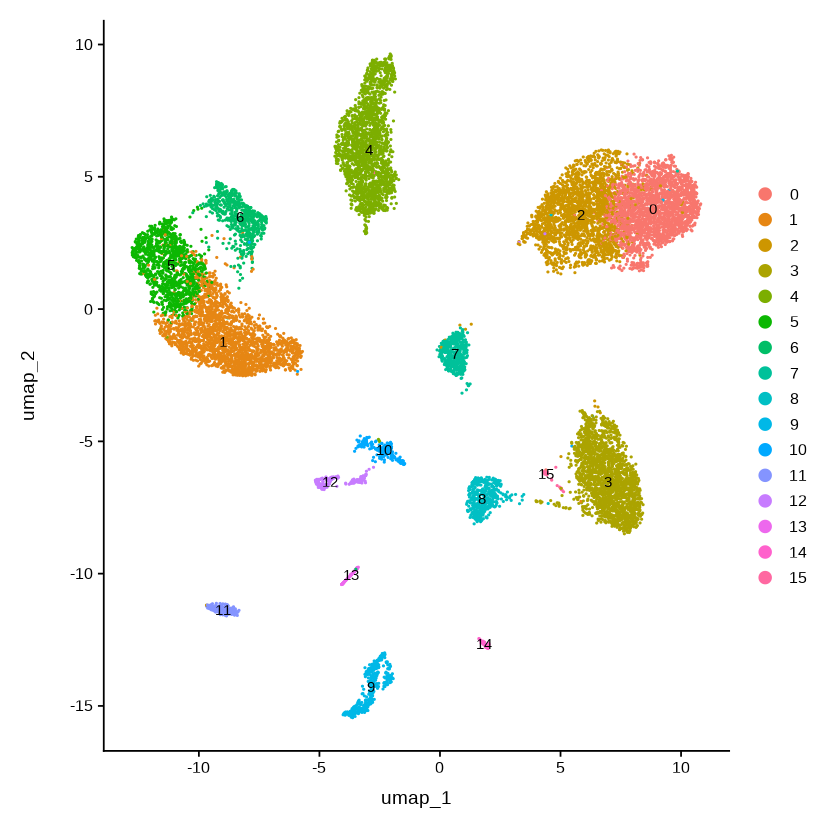

In [7]:
DimPlot(SO_merged, reduction = "umap", label = TRUE) 

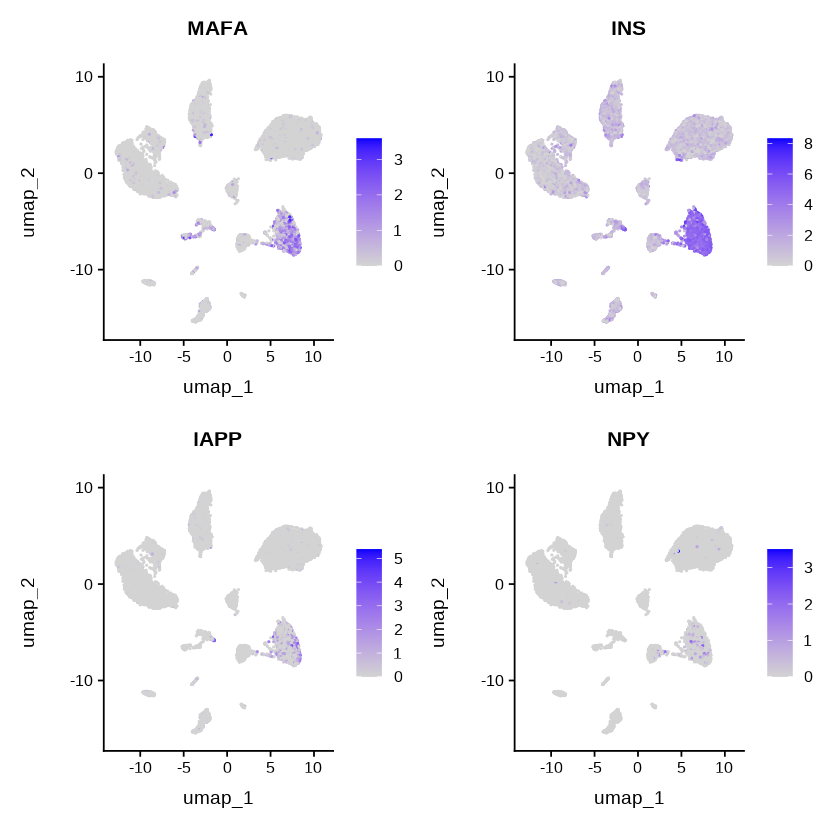

In [8]:
# beta cell markers
FeaturePlot(SO_merged, features = c("MAFA", "INS", "IAPP", "NPY"))

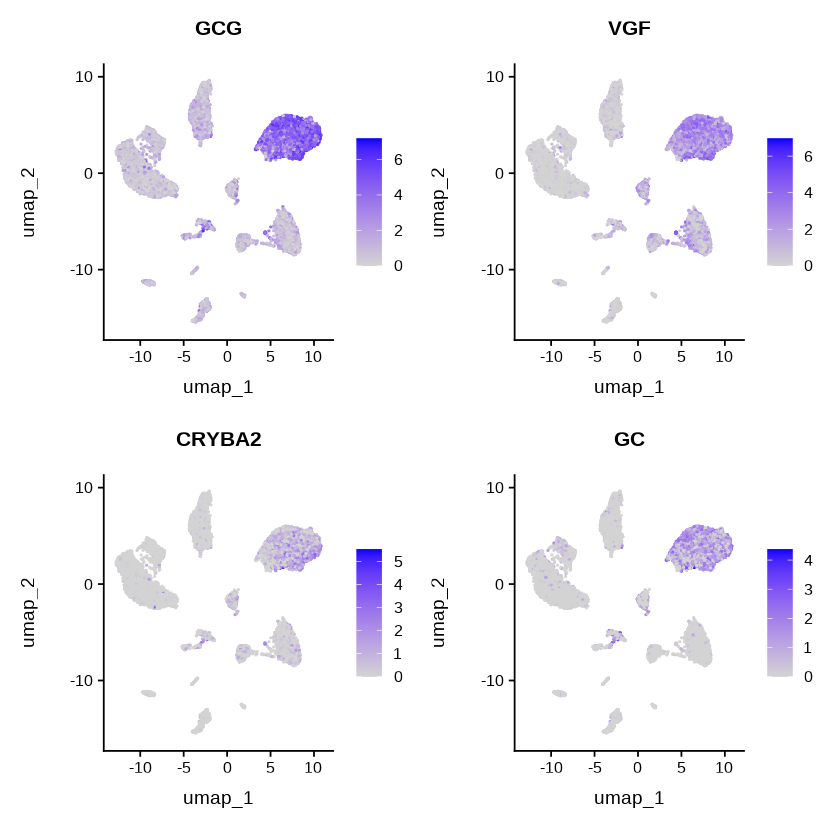

In [9]:
# alpha cell markers
FeaturePlot(SO_merged, features = c("GCG", "VGF", "CRYBA2", "GC"))

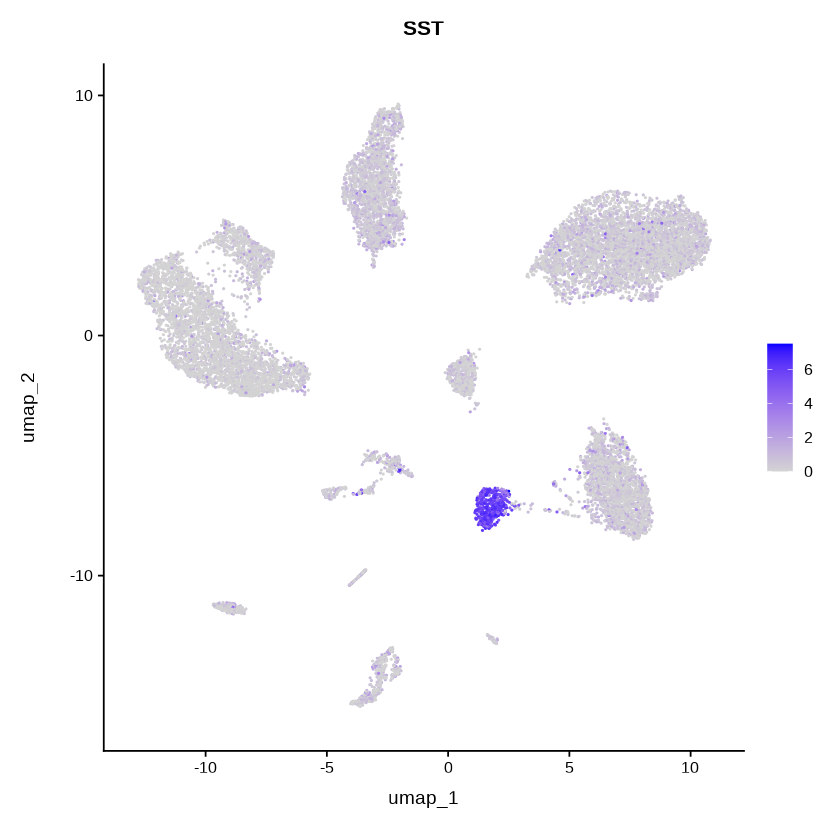

In [10]:
# delta cell markers
FeaturePlot(SO_merged, features = c("SST"))

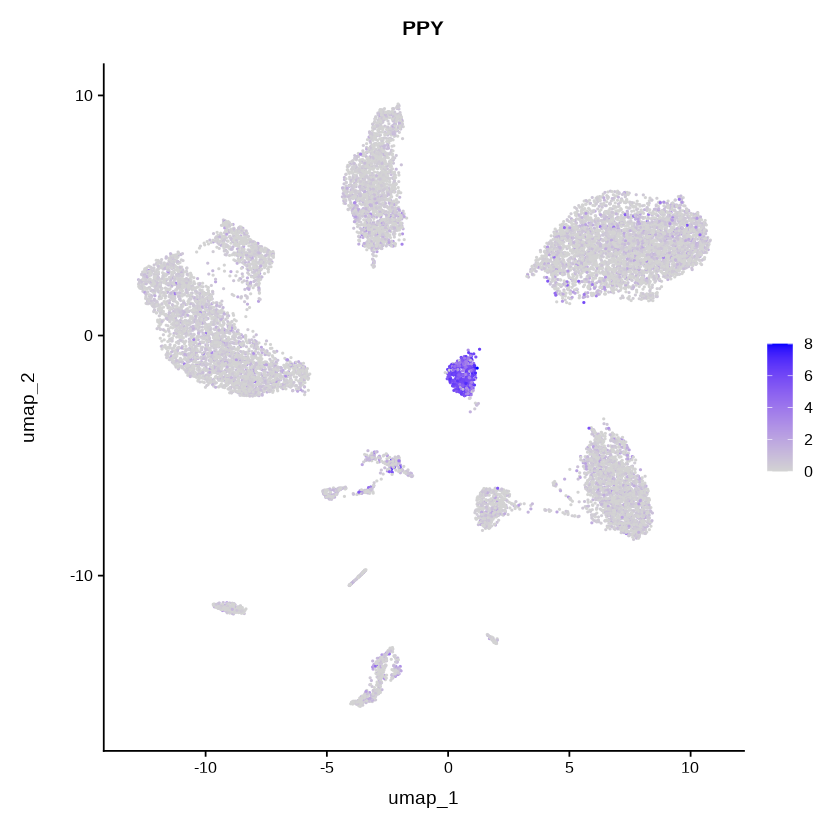

In [11]:
# gamma cell markers
FeaturePlot(SO_merged, features = c("PPY"))

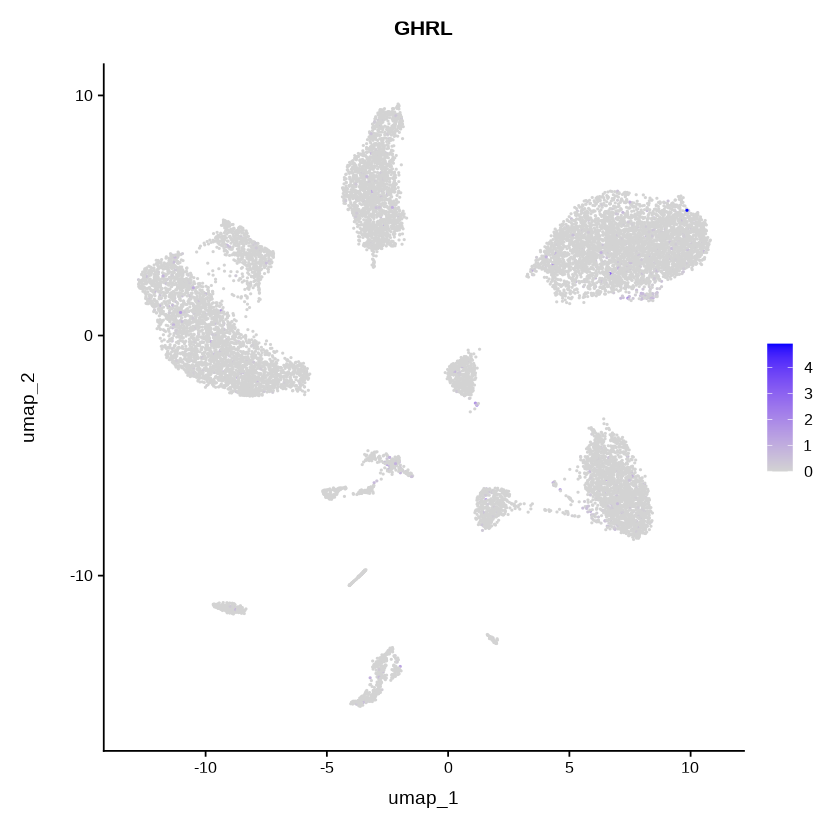

In [12]:
# epsilon cell marker
FeaturePlot(SO_merged, features = c("GHRL"))

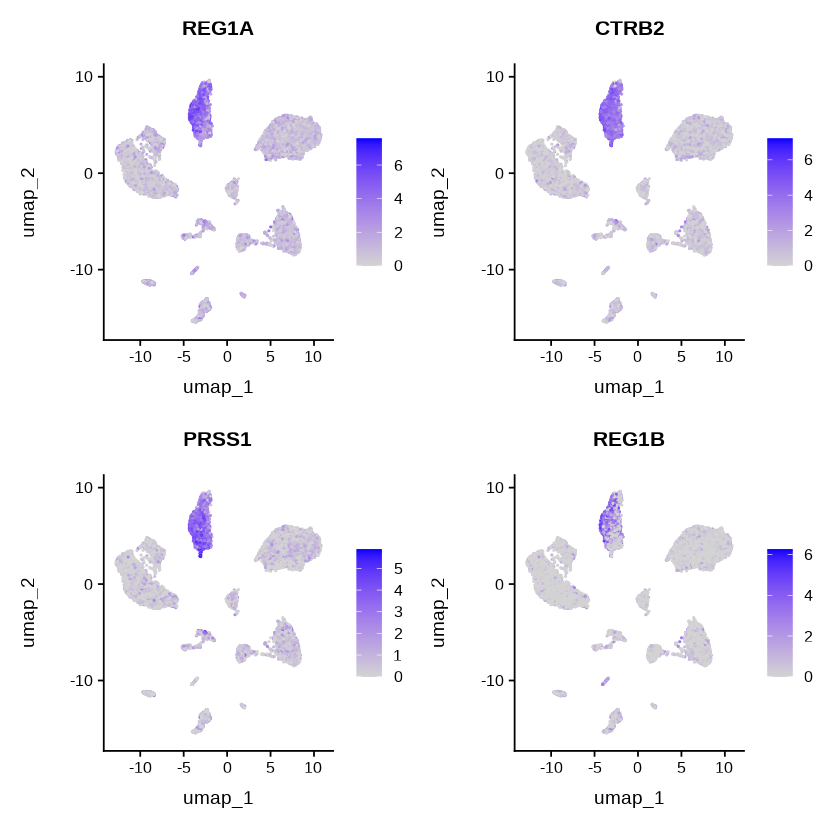

In [13]:
# acinar cell marker
FeaturePlot(SO_merged, features = c("REG1A", "CTRB2", "PRSS1", "REG1B"))

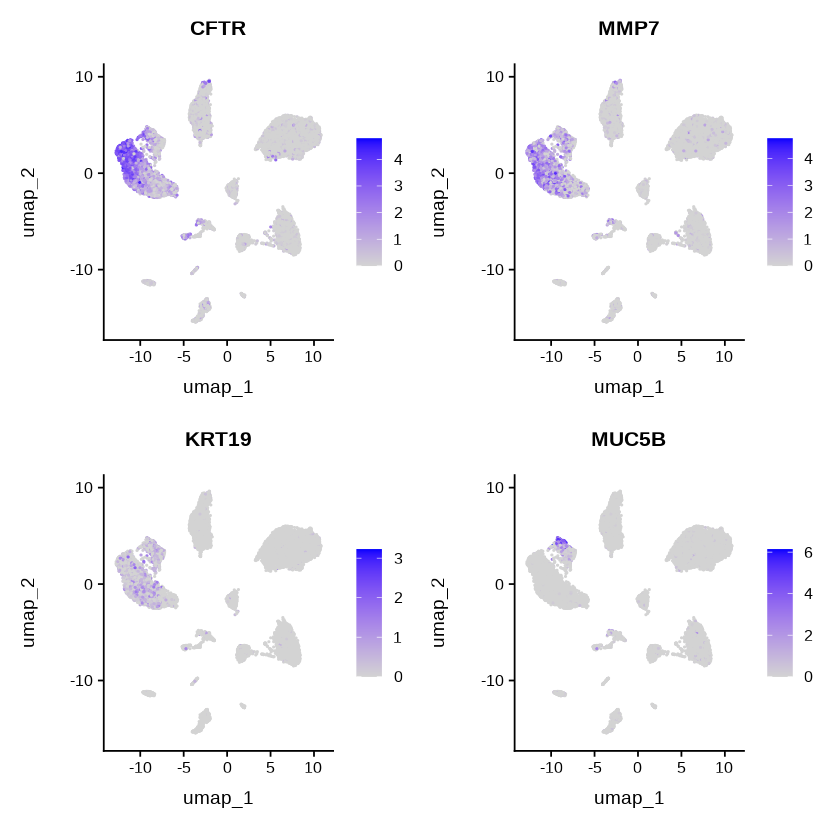

In [14]:
# ductal cell marker
FeaturePlot(SO_merged, features = c("CFTR", "MMP7", "KRT19", "MUC5B"))

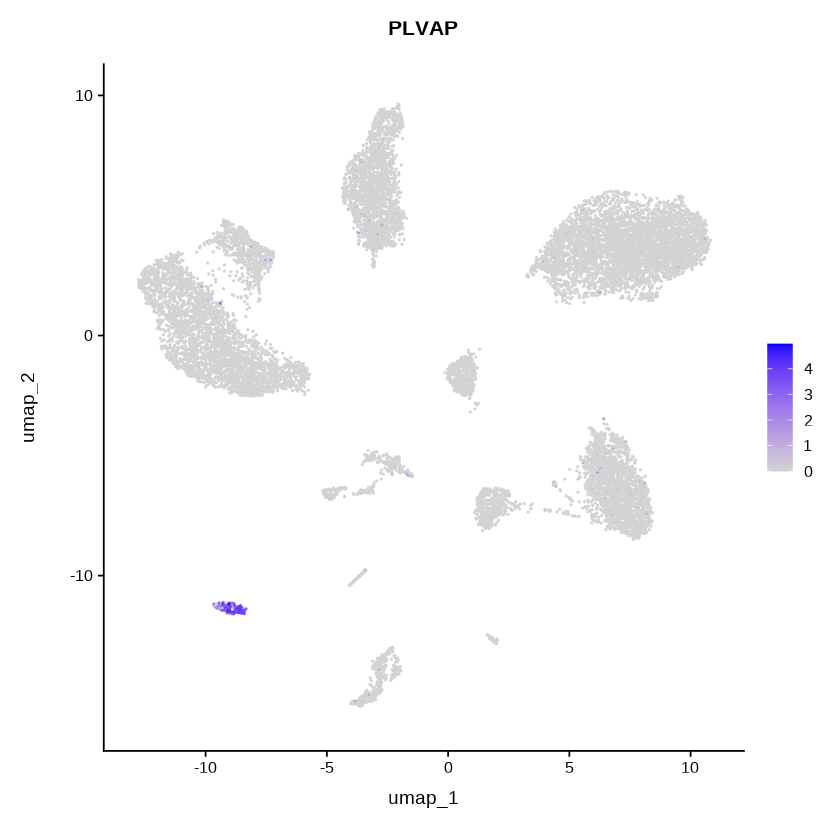

In [15]:
# Endothelial cell marker
FeaturePlot(SO_merged, features = c("PLVAP"))

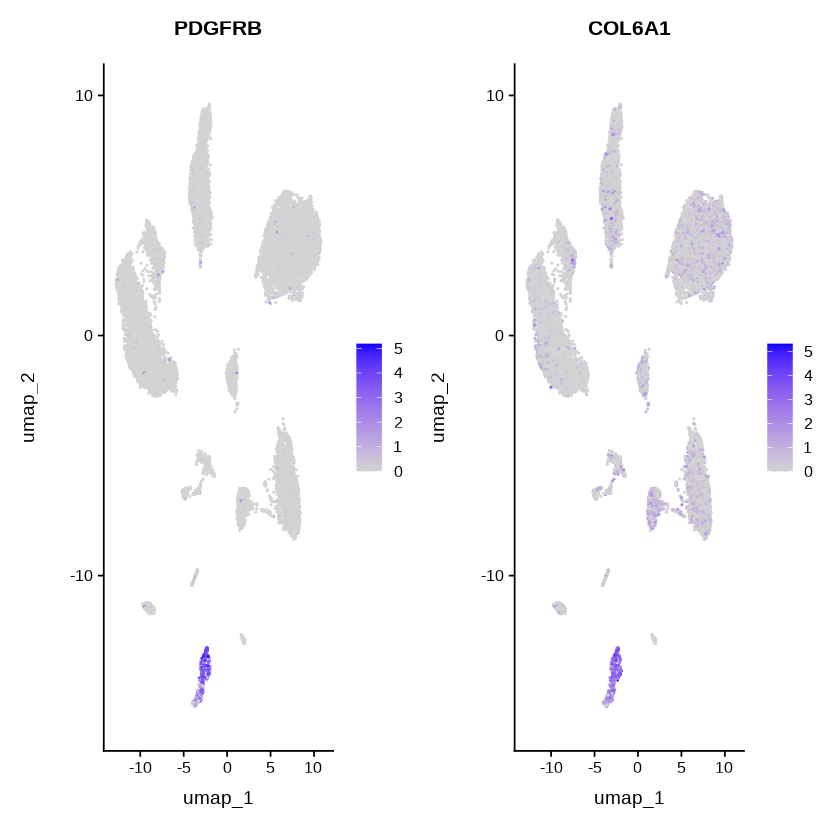

In [16]:
# Stellate cell marker
FeaturePlot(SO_merged, features = c("PDGFRB", "COL6A1"))

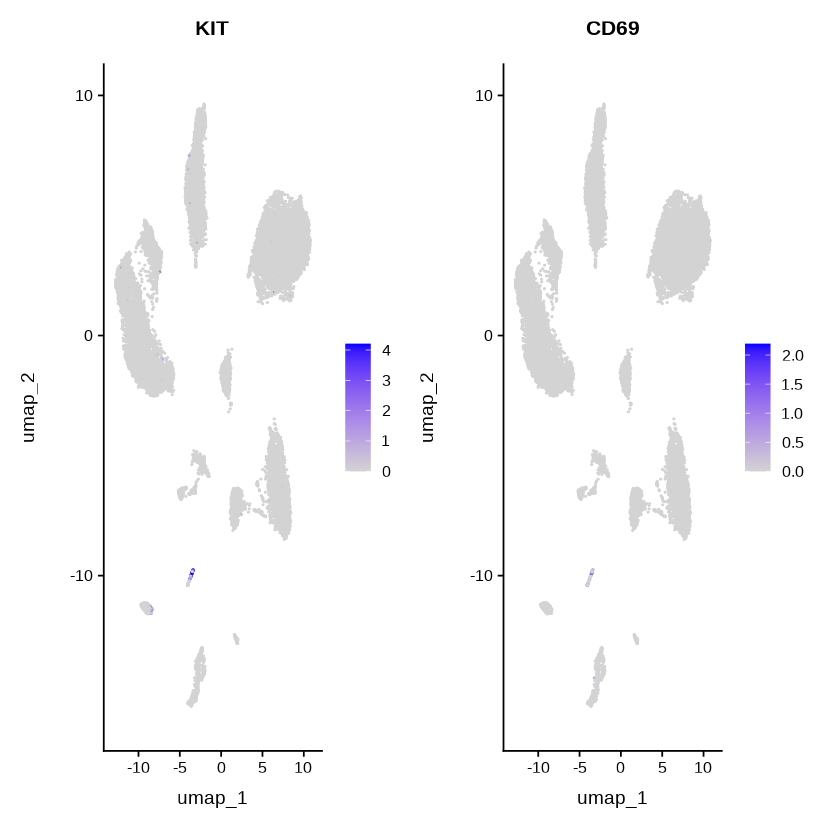

In [17]:
# Mast cell marker
FeaturePlot(SO_merged, features = c("KIT", "CD69"))

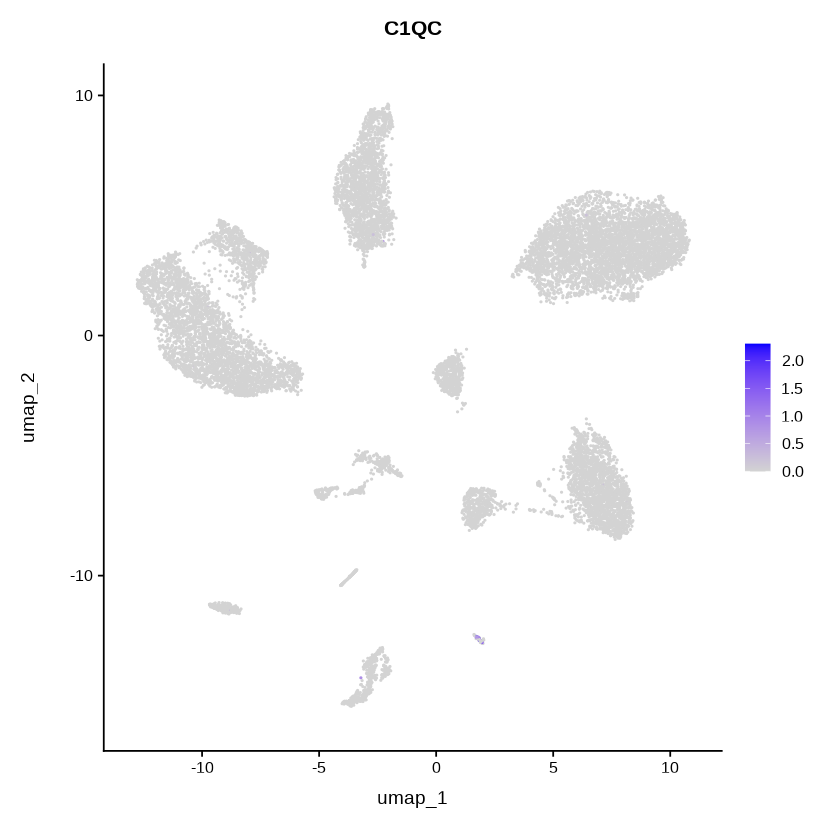

In [18]:
# Macrophage cell marker
FeaturePlot(SO_merged, features = c("C1QC"))

In [19]:
new.cluster.ids <- c("Alpha", "Ductal", "Alpha", "Beta", "Acinar", "Ductal", "Ductal", "Gamma", "Delta", "Stellate", "Unknown", "Endothelial", "Unknown", "Mast", "Macrophage", "Beta")
names(new.cluster.ids) <- levels(SO_merged)
SO_merged <- RenameIdents(SO_merged, new.cluster.ids)

In [20]:
theme_set(theme_minimal(base_family = "Latin Modern Math"))

In [21]:
p <- DimPlot(SO_merged, reduction = "umap", label = TRUE, label.size = 10, pt.size = 0.5)
p$layers[[2]]$aes_params$family <- "Latin Modern Math"  
p <- p + NoLegend() +
  labs(x = NULL, y = NULL) +
  theme(
    text = element_text(family = "Latin Modern Math"),
    axis.text = element_blank(),
    axis.ticks = element_blank()
  )

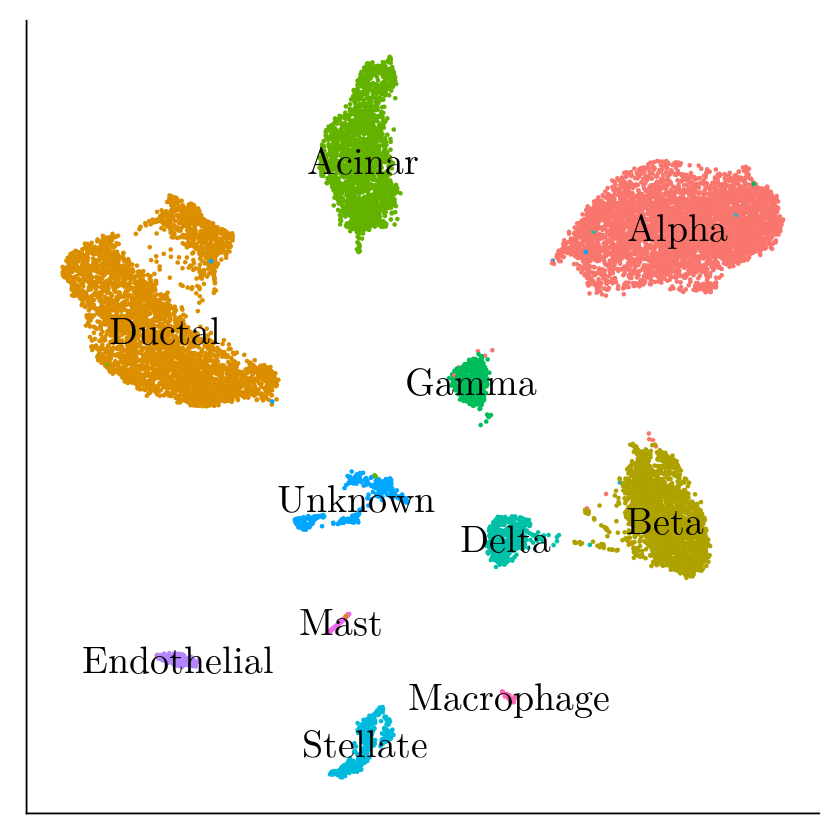

In [22]:
p

In [23]:
ggsave("figures/umap_all.pdf", plot = p, width = 8, height = 8)

In [24]:
table(Idents(SO_merged))


      Alpha      Ductal        Beta      Acinar       Gamma       Delta 
       4517        4043        2110        2038         455         444 
   Stellate     Unknown Endothelial        Mast  Macrophage 
        431         435         217          97          94 

In [25]:
SO_merged$CellType <- Idents(SO_merged)

In [26]:
head(SO_merged@meta.data, 5)

orig.ident  nCount_RNA nFeature_RNA percent.mt
HUB-NG-v005_HUB.NG.v005_369 HUB.NG.v005 66385      6748         0         
HUB-NG-v005_HUB.NG.v005_2   HUB.NG.v005  9378      2430         0         
HUB-NG-v005_HUB.NG.v005_336 HUB.NG.v005 86150      7784         0         
HUB-NG-v005_HUB.NG.v005_48  HUB.NG.v005 46151      7080         0         
HUB-NG-v005_HUB.NG.v005_290 HUB.NG.v005 15393      3890         0         
                            RNA_snn_res.0.5 seurat_clusters Donor Disease
HUB-NG-v005_HUB.NG.v005_369 3               3               GPRL  ND     
HUB-NG-v005_HUB.NG.v005_2   12              12              GPRL  ND     
HUB-NG-v005_HUB.NG.v005_336 6               6               GPRL  ND     
HUB-NG-v005_HUB.NG.v005_48  3               3               GPRL  ND     
HUB-NG-v005_HUB.NG.v005_290 1               1               GPRL  ND     
                            CellType
HUB-NG-v005_HUB.NG.v005_369 Beta    
HUB-NG-v005_HUB.NG.v005_2   Unknown 
HUB-NG-v005_HUB.NG.v005_336 Ductal  
HUB-NG-v005_HUB.NG.v005_48  Beta    
HUB-NG-v005_HUB.NG.v005_290 Ductal

In [27]:
# Save SO with Cell Types
#saveRDS(SO_merged, file="/no_backup/jferrer/jmidgley/VASAseq/VASAseq_jessie_with_CellType.RDS")

In [28]:
.libPaths("/no_backup/jferrer/jmidgley/R_libs")
library(dplyr)
library(Seurat)
library(harmony)
library(tidyr)
library(tibble)
library(ggplot2)

In [29]:
SO_merged <- readRDS("/no_backup/jferrer/jmidgley/VASAseq/VASAseq_jessie_with_CellType.RDS")

In [30]:
head(SO_merged@meta.data, 5)

orig.ident  nCount_RNA nFeature_RNA percent.mt
HUB-NG-v005_HUB.NG.v005_369 HUB.NG.v005 66385      6748         0         
HUB-NG-v005_HUB.NG.v005_2   HUB.NG.v005  9378      2430         0         
HUB-NG-v005_HUB.NG.v005_336 HUB.NG.v005 86150      7784         0         
HUB-NG-v005_HUB.NG.v005_48  HUB.NG.v005 46151      7080         0         
HUB-NG-v005_HUB.NG.v005_290 HUB.NG.v005 15393      3890         0         
                            RNA_snn_res.0.5 seurat_clusters Donor Disease
HUB-NG-v005_HUB.NG.v005_369 3               3               GPRL  ND     
HUB-NG-v005_HUB.NG.v005_2   12              12              GPRL  ND     
HUB-NG-v005_HUB.NG.v005_336 6               6               GPRL  ND     
HUB-NG-v005_HUB.NG.v005_48  3               3               GPRL  ND     
HUB-NG-v005_HUB.NG.v005_290 1               1               GPRL  ND     
                            CellType
HUB-NG-v005_HUB.NG.v005_369 Beta    
HUB-NG-v005_HUB.NG.v005_2   Unknown 
HUB-NG-v005_HUB.NG.v005_336 Ductal  
HUB-NG-v005_HUB.NG.v005_48  Beta    
HUB-NG-v005_HUB.NG.v005_290 Ductal

In [31]:
# Filter for alpha and beta cells
SO_filtered <- subset(SO_merged, subset = Disease %in% c("ND", "T2D") & CellType %in% c("Alpha", "Beta"))
SO_filtered

An object of class Seurat 
20551 features across 5848 samples within 1 assay 
Active assay: RNA (20551 features, 2000 variable features)
 3 layers present: scale.data, data, counts
 3 dimensional reductions calculated: pca, harmony, umap

Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`).”


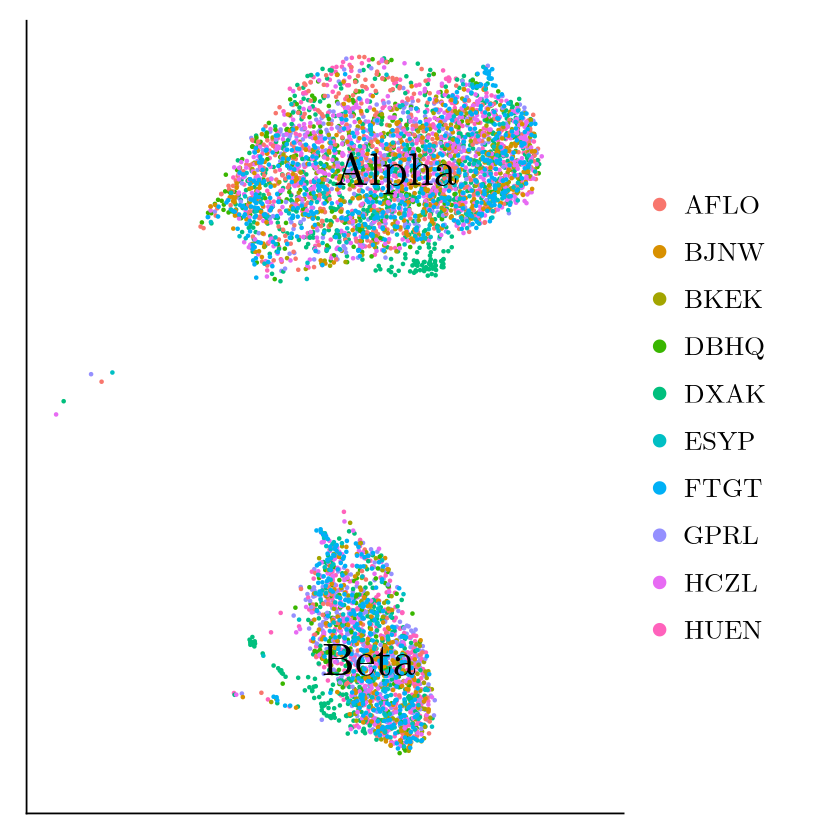

In [32]:
p <- DimPlot(
  SO_filtered,
  reduction = "umap",
  group.by = "Donor",
  label = FALSE,
  pt.size = 0.5
)

# Add CellType info for labeling
p$data$CellType <- SO_filtered$CellType[rownames(p$data)]

# Apply font to cluster labels
p$layers[[1]]$aes_params$family <- "Latin Modern Math"

# Add labels manually using LabelClusters
p <- LabelClusters(
  plot = p,
  id = "CellType",
  repel = FALSE,
  size = 12,
  family = "Latin Modern Math"
)

# Add theme and formatting
p <- p +
  ggplot2::labs(title = NULL, x = NULL, y = NULL) +
  ggplot2::theme(
    text = element_text(family = "Latin Modern Math"),
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    legend.text = element_text(size = 20),
    legend.spacing.y = unit(1, "cm"),
    legend.key.height = unit(1, "cm")
  )


p <- p + xlim(0, 12) + ylim(-9,6)
p

In [33]:
ggsave("figures/umap_alpha_beta.pdf", plot = p, width = 8, height = 8)

Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`).”


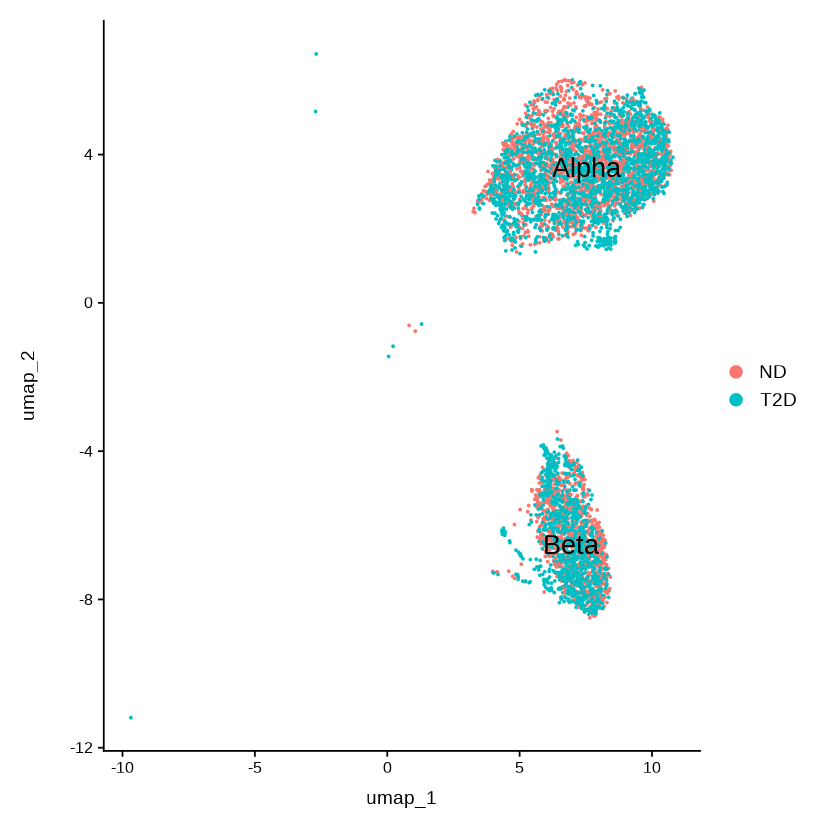

In [34]:
p <- DimPlot(
  SO_filtered,
  reduction = "umap",
  group.by = "Disease",
  label = FALSE
)

# Make sure the plot object has the CellType info
p$data$CellType <- SO_filtered$CellType[rownames(p$data)]

LabelClusters(
  plot = p,
  id = "CellType",
  repel = FALSE,
  size = 7
) +
  ggplot2::labs(title = NULL) + 
  ggplot2::theme(
    legend.text = element_text(size = 14),   # increase legend text size
  )

In [35]:
cells_to_keep <- colnames(SO_filtered)
length(cells_to_keep)

[1] 5848

In [36]:
unique(SO_filtered@meta.data$Disease)

[1] "ND"  "T2D"

In [37]:
celltype_mapping <- setNames(as.character(SO_filtered@meta.data$CellType),
                             colnames(SO_filtered))

In [38]:
celltype_mapping

HUB-NG-v005_HUB.NG.v005_369  HUB-NG-v005_HUB.NG.v005_48 
                     "Beta"                      "Beta" 
HUB-NG-v005_HUB.NG.v005_299 HUB-NG-v005_HUB.NG.v005_206 
                     "Beta"                      "Beta" 
 HUB-NG-v005_HUB.NG.v005_93 HUB-NG-v005_HUB.NG.v005_304 
                     "Beta"                     "Alpha" 
HUB-NG-v005_HUB.NG.v005_255  HUB-NG-v005_HUB.NG.v005_65 
                     "Beta"                      "Beta" 
HUB-NG-v005_HUB.NG.v005_271 HUB-NG-v005_HUB.NG.v005_361 
                    "Alpha"                     "Alpha" 
 HUB-NG-v005_HUB.NG.v005_35 HUB-NG-v005_HUB.NG.v005_267 
                    "Alpha"                      "Beta" 
HUB-NG-v005_HUB.NG.v005_319 HUB-NG-v005_HUB.NG.v005_356 
                     "Beta"                     "Alpha" 
HUB-NG-v005_HUB.NG.v005_362 HUB-NG-v005_HUB.NG.v005_281 
                    "Alpha"                      "Beta" 
HUB-NG-v005_HUB.NG.v005_287 HUB-NG-v005_HUB.NG.v005_254 
                     "Beta"                      "Beta" 
HUB-NG-v005_HUB.NG.v005_256 HUB-NG-v005_HUB.NG.v005_379 
                    "Alpha"                      "Beta" 
HUB-NG-v005_HUB.NG.v005_138 HUB-NG-v005_HUB.NG.v005_331 
                    "Alpha"                     "Alpha" 
 HUB-NG-v005_HUB.NG.v005_88 HUB-NG-v005_HUB.NG.v005_377 
                     "Beta"                     "Alpha" 
 HUB-NG-v005_HUB.NG.v005_14  HUB-NG-v005_HUB.NG.v005_55 
                     "Beta"                     "Alpha" 
HUB-NG-v005_HUB.NG.v005_156 HUB-NG-v005_HUB.NG.v005_151 
                    "Alpha"                      "Beta" 
HUB-NG-v005_HUB.NG.v005_142 HUB-NG-v005_HUB.NG.v005_301 
                     "Beta"                     "Alpha" 
HUB-NG-v005_HUB.NG.v005_201 HUB-NG-v005_HUB.NG.v005_266 
                     "Beta"                     "Alpha" 
HUB-NG-v005_HUB.NG.v005_371  HUB-NG-v005_HUB.NG.v005_87 
                    "Alpha"                     "Alpha" 
HUB-NG-v005_HUB.NG.v005_192  HUB-NG-v005_HUB.NG.v005_47 
                     "Beta"                      "Beta" 
HUB-NG-v005_HUB.NG.v005_258 HUB-NG-v005_HUB.NG.v005_354 
                     "Beta"                      "Beta" 
HUB-NG-v005_HUB.NG.v005_116  HUB-NG-v005_HUB.NG.v005_17 
                    "Alpha"                     "Alpha" 
 HUB-NG-v005_HUB.NG.v005_40  HUB-NG-v005_HUB.NG.v005_56 
                     "Beta"                     "Alpha" 
HUB-NG-v005_HUB.NG.v005_152 HUB-NG-v005_HUB.NG.v005_129 
                     "Beta"                     "Alpha" 
HUB-NG-v005_HUB.NG.v005_217 HUB-NG-v005_HUB.NG.v005_310 
                     "Beta"                     "Alpha" 
 HUB-NG-v005_HUB.NG.v005_73 HUB-NG-v005_HUB.NG.v005_259 
                     "Beta"                      "Beta" 
HUB-NG-v005_HUB.NG.v005_346 HUB-NG-v005_HUB.NG.v005_370 
                     "Beta"                     "Alpha" 
  HUB-NG-v005_HUB.NG.v005_7 HUB-NG-v005_HUB.NG.v005_378 
                     "Beta"                      "Beta" 
HUB-NG-v005_HUB.NG.v005_368 HUB-NG-v005_HUB.NG.v005_226 
                    "Alpha"                      "Beta" 
HUB-NG-v005_HUB.NG.v005_242 HUB-NG-v005_HUB.NG.v005_252 
                     "Beta"                     "Alpha" 
 HUB-NG-v005_HUB.NG.v005_80  HUB-NG-v005_HUB.NG.v005_22 
                    "Alpha"                      "Beta" 
HUB-NG-v005_HUB.NG.v005_178 HUB-NG-v005_HUB.NG.v005_373 
                     "Beta"                     "Alpha" 
HUB-NG-v005_HUB.NG.v005_315  HUB-NG-v005_HUB.NG.v005_34 
                     "Beta"                     "Alpha" 
HUB-NG-v005_HUB.NG.v005_144  HUB-NG-v005_HUB.NG.v005_95 
                     "Beta"                     "Alpha" 
HUB-NG-v005_HUB.NG.v005_130 HUB-NG-v005_HUB.NG.v005_199 
                     "Beta"                     "Alpha" 
 HUB-NG-v005_HUB.NG.v005_36  HUB-NG-v005_HUB.NG.v005_16 
                    "Alpha"                     "Alpha" 
 HUB-NG-v005_HUB.NG.v005_89 HUB-NG-v005_HUB.NG.v005_335 
                     "Beta"                     "Alpha" 
HUB-NG-v00

In [39]:
avg_gene_exp <- AggregateExpression(
  SO_filtered,
  group.by = "CellType",
  assays = "RNA",
  slot = "counts"
)$RNA

In [40]:
avg_gene_exp

20551 x 2 sparse Matrix of class "dgCMatrix"
                            Alpha    Beta
WASH7P                       2207    1433
LINC00115                    6140    3489
LINC01409                    1515     781
SAMD11                       1596   56250
NOC2L                       19791    8158
KLHL17                       3000    2720
AGRN                        16936    4852
C1orf159                     2263    1085
ENSG00000272141              7959    2524
SDF4                        30238   13929
UBE2J2                      17715    7035
SCNN1D                       1107     604
ACAP3                       52626   30577
PUSL1                        9384    4243
DVL1                        20922   10216
AURKAIP1                     8116    3057
CCNL2                       47606   26881
MRPL20                       1678     775
ANKRD65                      5090    3404
ATAD3B                       8696    4449
ATAD3A                       6222    2484
SSU72                       220

In [41]:
length(rownames(avg_gene_exp))

[1] 20551

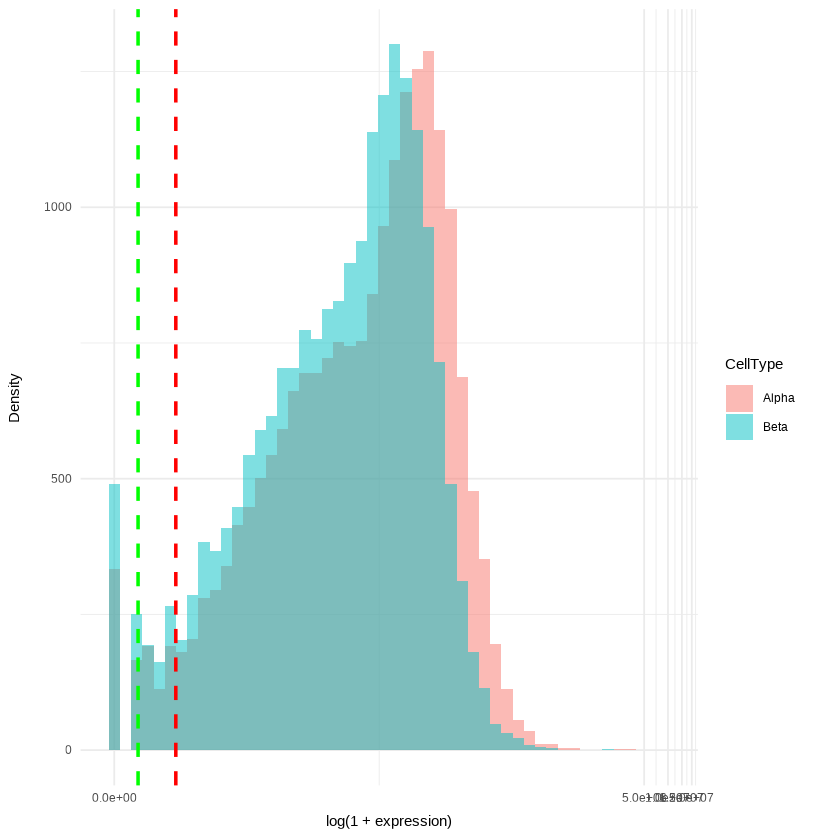

In [42]:
avg_gene_exp_long <- as.data.frame(avg_gene_exp) %>%
  rownames_to_column("Gene") %>%
  pivot_longer(
    cols = -Gene,                 
    names_to = "CellType",
    values_to = "Expression"
  )


ggplot(avg_gene_exp_long, aes(x = Expression, fill = CellType)) +
  #geom_density(alpha = 0.5) +
  geom_histogram(position = "identity", alpha = 0.5, bins = 50) +
  geom_vline(xintercept = 5, color = "red", linetype = "dashed", linewidth = 1) +
  geom_vline(xintercept = 1, color = "green", linetype = "dashed", linewidth = 1) +
  scale_x_continuous(trans = "log1p") + 
  theme_minimal() +
  labs(
    x = "log(1 + expression)",
    y = "Density"
  )

In [43]:
genes_in_alpha_beta <- rownames(avg_gene_exp)[
  avg_gene_exp[, "Alpha"] > 5 & avg_gene_exp[, "Beta"] > 5
]

In [44]:
genes_in_alpha_beta

[1] "WASH7P"                    "LINC00115"                
    [3] "LINC01409"                 "SAMD11"                   
    [5] "NOC2L"                     "KLHL17"                   
    [7] "AGRN"                      "C1orf159"                 
    [9] "ENSG00000272141"           "SDF4"                     
   [11] "UBE2J2"                    "SCNN1D"                   
   [13] "ACAP3"                     "PUSL1"                    
   [15] "DVL1"                      "AURKAIP1"                 
   [17] "CCNL2"                     "MRPL20"                   
   [19] "ANKRD65"                   "ATAD3B"                   
   [21] "ATAD3A"                    "SSU72"                    
   [23] "MIB2"                      "SLC35E2B"                 
   [25] "CDK11A"                    "ENSG00000290854"          
   [27] "NADK"                      "GNB1"                     
   [29] "PRKCZ"                     "FAAP20"                   
   [31] "SKI"                       "RER1"                     
   [33] "PEX10"                     "PLCH2"                    
   [35] "PANK4"                     "ARHGEF16"                 
   [37] "TPRG1L"                    "WRAP73"                   
   [39] "GFOD3P"                    "LRRC47"                   
   [41] "CEP104"                    "DFFB"                     
   [43] "LINC01134"                 "AJAP1"                    
   [45] "CHD5"                      "PLEKHG5"                  
   [47] "NOL9"                      "ZBTB48"                   
   [49] "KLHL21"                    "PHF13"                    
   [51] "THAP3"                     "CAMTA1"                   
   [53] "PER3"                      "PARK7"                    
   [55] "ERRFI1"                    "RERE"                     
   [57] "ENO1"                      "H6PD"                     
   [59] "PIK3CD"                    "CLSTN1"                   
   [61] "CTNNBIP1"                  "UBE4B"                    
   [63] "KIF1B"                     "PGD"                      
   [65] "PEX14"                     "CASZ1"                    
   [67] "C1orf127"                  "TARDBP"                   
   [69] "SRM"                       "MTOR"                     
   [71] "UBIAD1"                    "DISP3"                    
   [73] "CLCN6"                     "AGTRAP"                   
   [75] "MTHFR"                     "ENSG00000285646"          
   [77] "MIIP"                      "VPS13D"                   
   [79] "PRDM2"                     "KAZN"                     
   [81] "TMEM51"                    "CTRC"                     
   [83] "CASP9"                     "DNAJC16"                  
   [85] "CHCHD2P6"                  "DDI2"                     
   [87] "PLEKHM2"                   "UQCRHL"                   
   [89] "SPEN"                      "ZBTB17"                   
   [91] "EPHA2"                     "EPHA2.AS1"                
   [93] "FBXO42"                    "SZRD1"                    
   [95] "NBPF1"                     "CROCC"                    
   [97] "MFAP2"                     "ATP13A2"                  
   [99] "RCC2"                      "ARHGEF10L"                
  [101] "UBR4"                      "EMC1"                     
  [103] "AKR7A2"                    "SLC66A1"                  
  [105] "CAPZB"                     "MICOS10"                  
  [107] "TMCO4"                     "OTUD3"                    
  [109] "CAMK2N1"                   "MUL1"                     
  [111] "PINK1"                     "DDOST"                    
  [113] "HP1BP3"                    "EIF4G3"                   
  [115] "ECE1"                      "NBPF3"                    
  [117] "RAP1GAP"                   "USP48"                    
  [119] "HSPG2"                     "CELA3A"                   
  [121] "WNT4"                      "ZBTB40"                   
  [123] "EPHB2"                     "KDM1A"                    
  [125] "HNRNPR"                    

In [45]:
length(genes_in_alpha_beta)

[1] 18994

In [46]:
length(rownames(avg_gene_exp)[
  avg_gene_exp[, "Alpha"] > 0 & avg_gene_exp[, "Beta"] > 0
])

[1] 19917

In [47]:
#saveRDS(cells_to_keep, file = "/no_backup/jferrer/jmidgley/VASAseq/alpha_and_beta_cells.rds")

In [48]:
#saveRDS(celltype_mapping, file = "/no_backup/jferrer/jmidgley/VASAseq/celltype_mapping.rds")

In [49]:
#saveRDS(genes_in_alpha_beta, file = "/no_backup/jferrer/jmidgley/VASAseq/genes_in_alpha_beta.rds")